######  DSC630-T303 Predictive Analytics  #

## Week 6 & 9 - Model Interpretation ##

### Saravanan Janarthanan ###

--------

##### Week 6- Questions to be addressed in the analysis #####
- Will I be able to answer the questions I want to answer with the data I have?
- What visualizations are especially useful for explaining my data?
- Do I need to adjust the data and/or driving questions?
- Do I need to adjust my model/evaluation choices?
- Are my original expectations still reasonable?

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

# Load the traiing data
airline_df = pd.read_csv("Airline_Passenger_Satisfaction_classification.csv")

In [2]:
airline_df.head()

,SN,id,Gender,Membership,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Member,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,Not Satisfied
1,1,5047,Male,Non Member,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,Not Satisfied
2,2,110028,Female,Member,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Member,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,Not Satisfied
4,4,119299,Male,Member,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# list the training dataset info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SN                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Membership                         103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
# Load the test data
test_df = pd.read_csv("test.csv")

In [5]:
# list the test dataset info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SN                                 25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Membership                         25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
# drop both SN and id numerical columns and categorical columns
ref_al_df = airline_df.drop(['SN', 'id', 'Gender', 'Membership', 'Type of Travel', 'Class', 'satisfaction'], axis=1)

<Figure size 1500x1000 with 0 Axes>

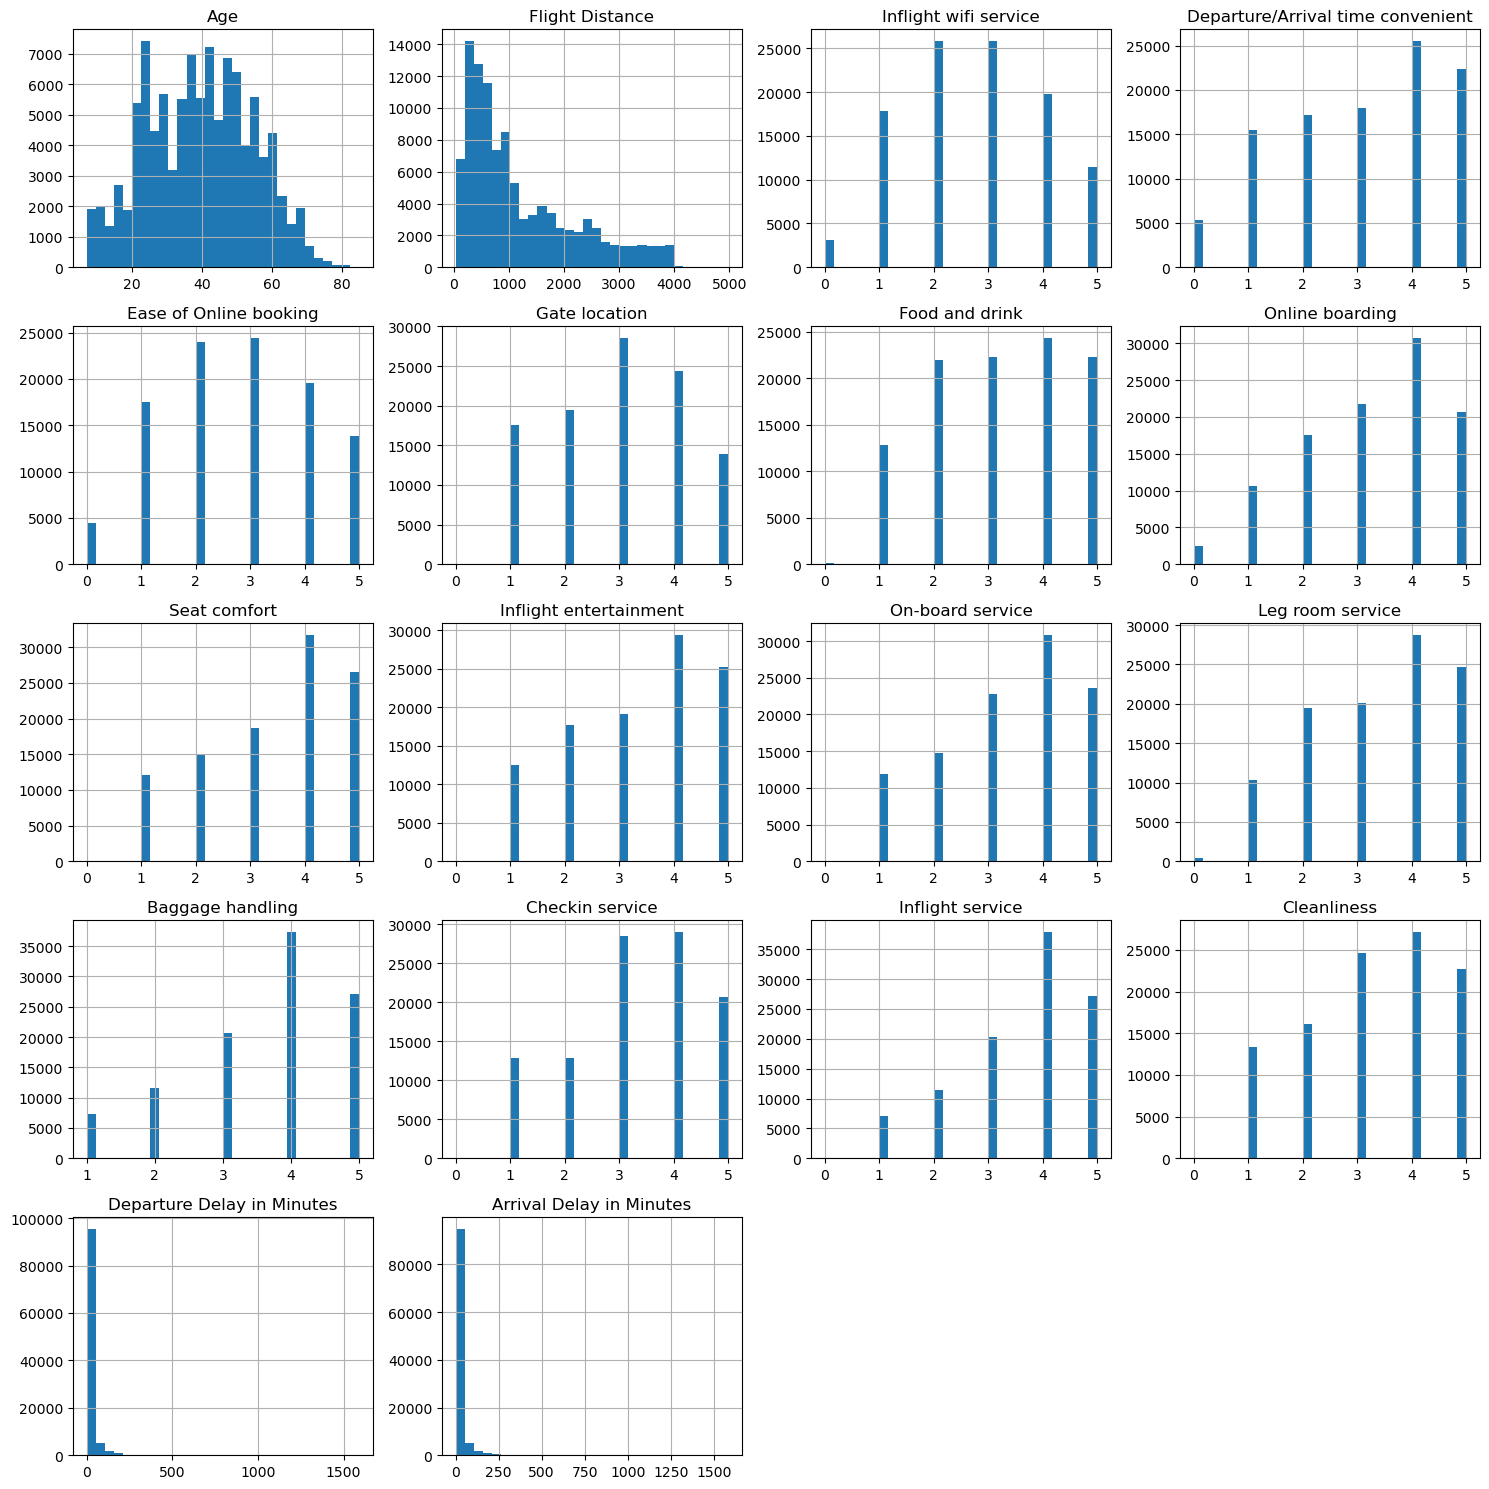

In [7]:
# Plot distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
ref_al_df.hist(bins=30, figsize=(15, 15))
plt.tight_layout()
plt.show()

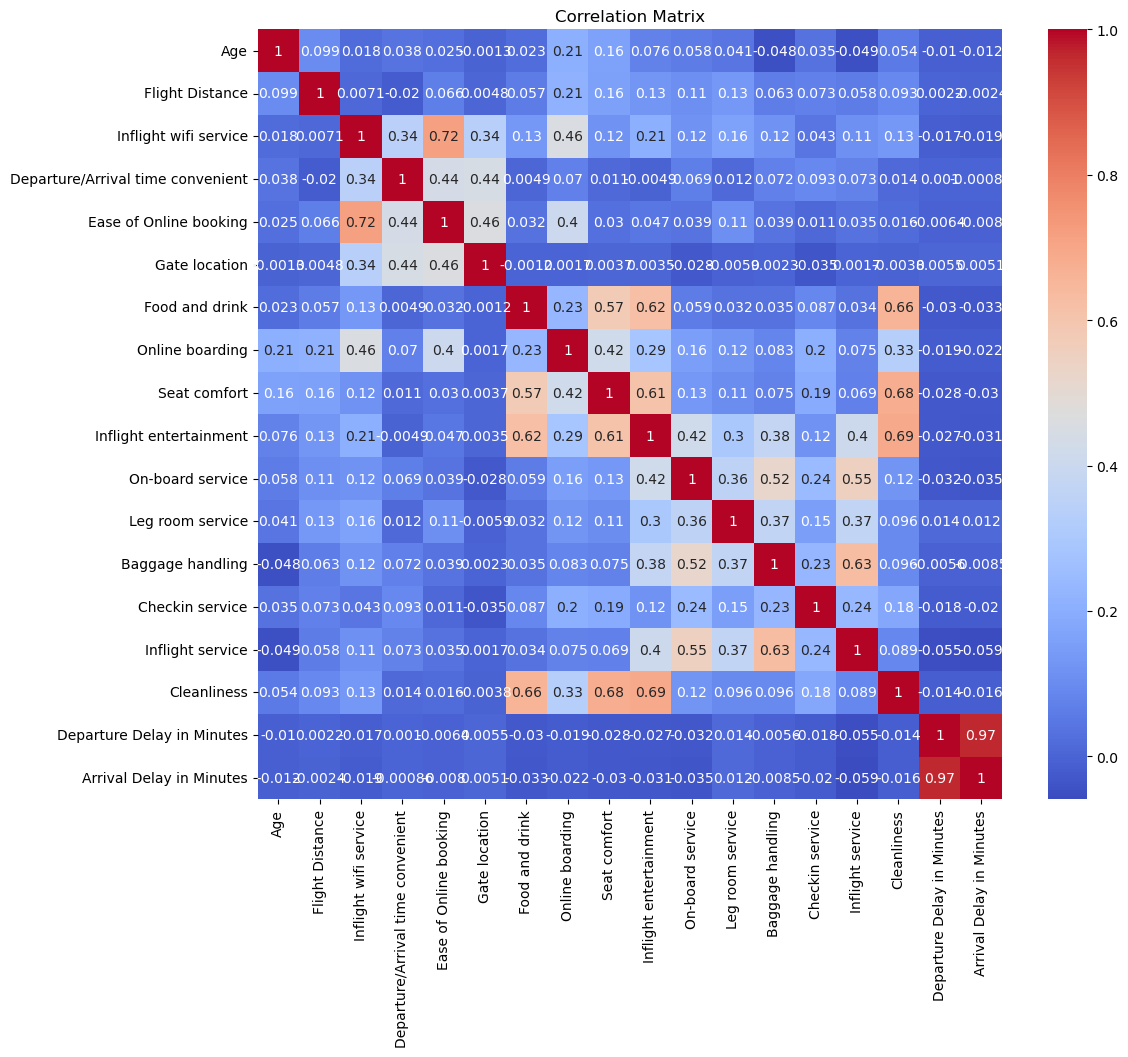

In [8]:
# Plot the correlation among features
plt.figure(figsize=(12, 10))
corr_matrix = ref_al_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Find the actual count of Gender values
airline_df.Gender.value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [10]:
# Find the actual count of Gender values
airline_df.Membership.value_counts()

Membership
Member        84923
Non Member    18981
Name: count, dtype: int64

In [11]:
# Find the actual count of Gender values
airline_df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [12]:
# Find the actual count of Gender values
airline_df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [13]:
# Find the actual count of Gender values
airline_df['satisfaction'].value_counts()

satisfaction
Not Satisfied    58879
satisfied        45025
Name: count, dtype: int64

In [14]:
# Identify and group categorical and numerical value columns for futrue analysis
import numpy as np
cat_columns = airline_df.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = airline_df.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Membership', 'Type of Travel', 'Class', 'satisfaction']

['SN', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


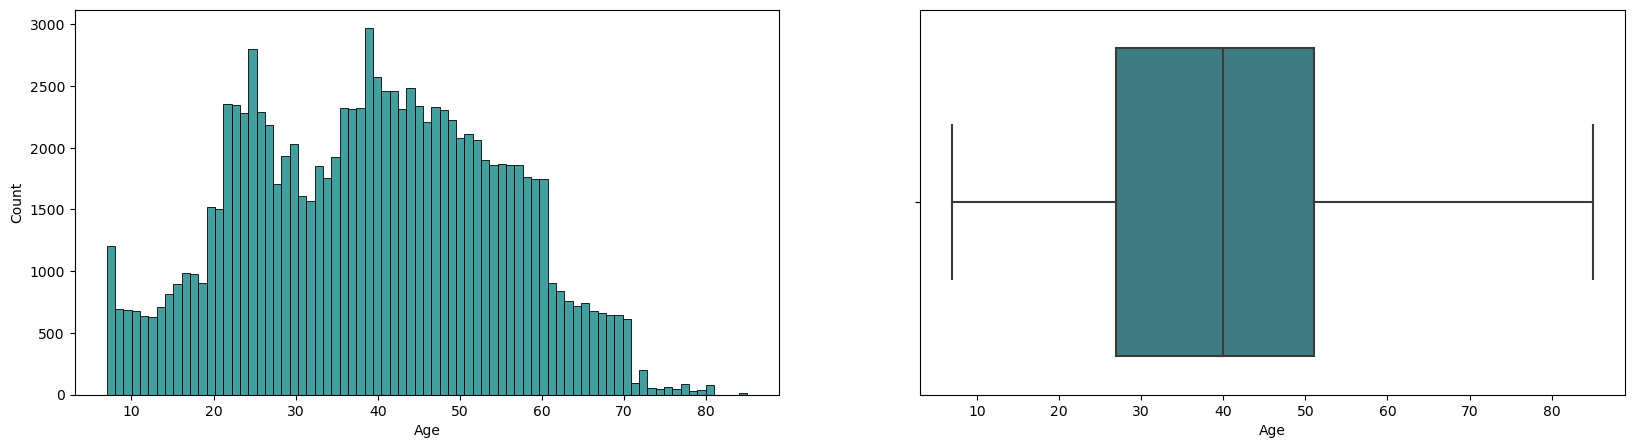

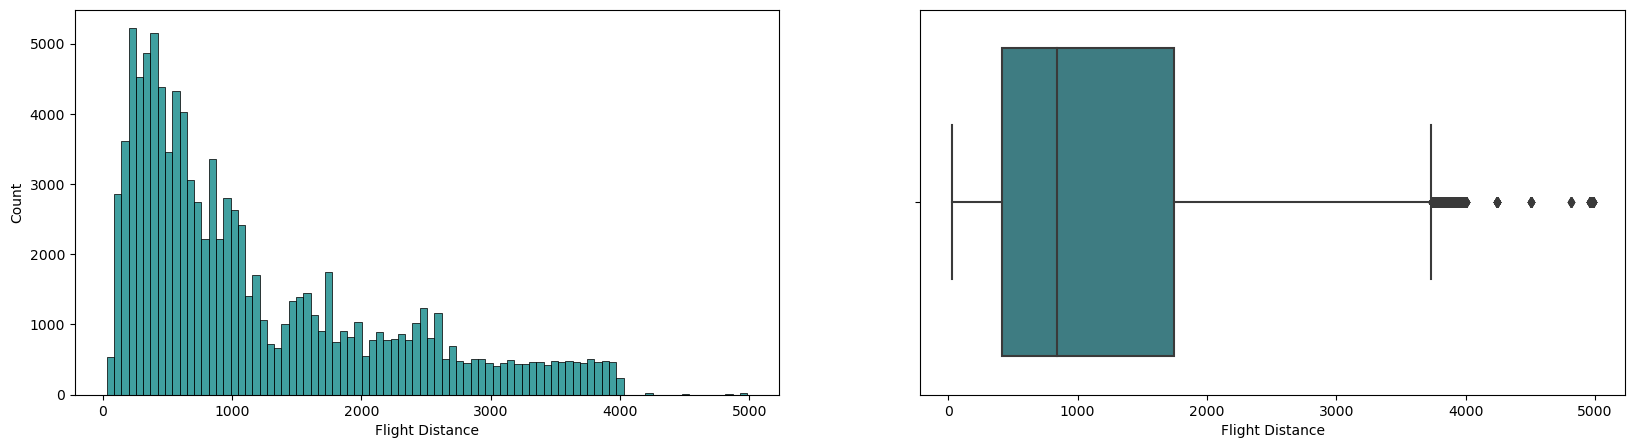

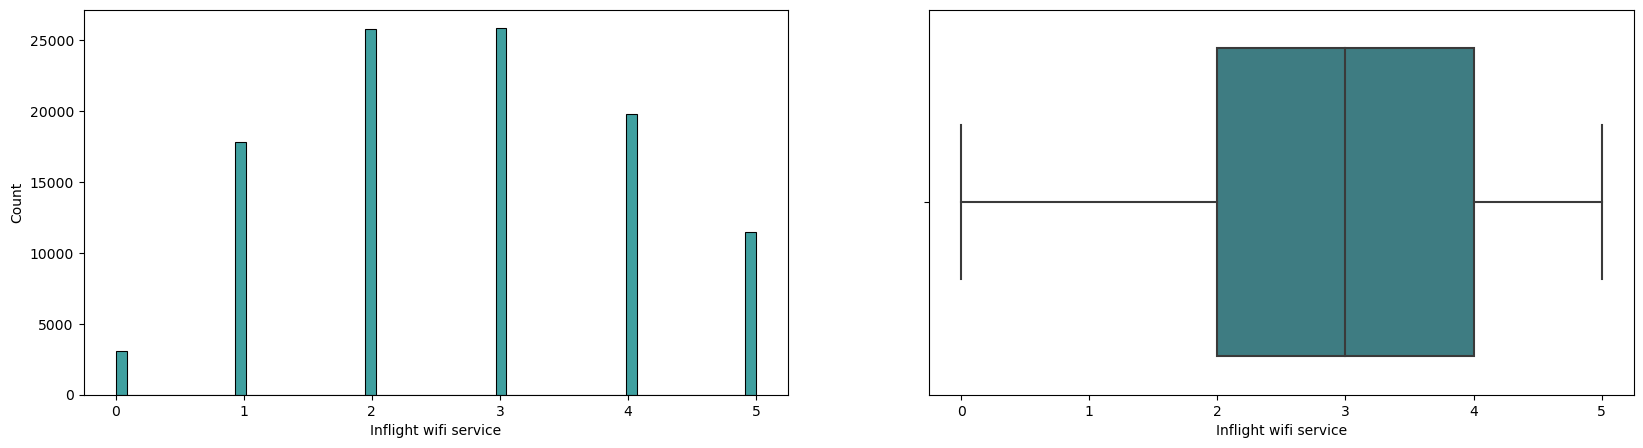

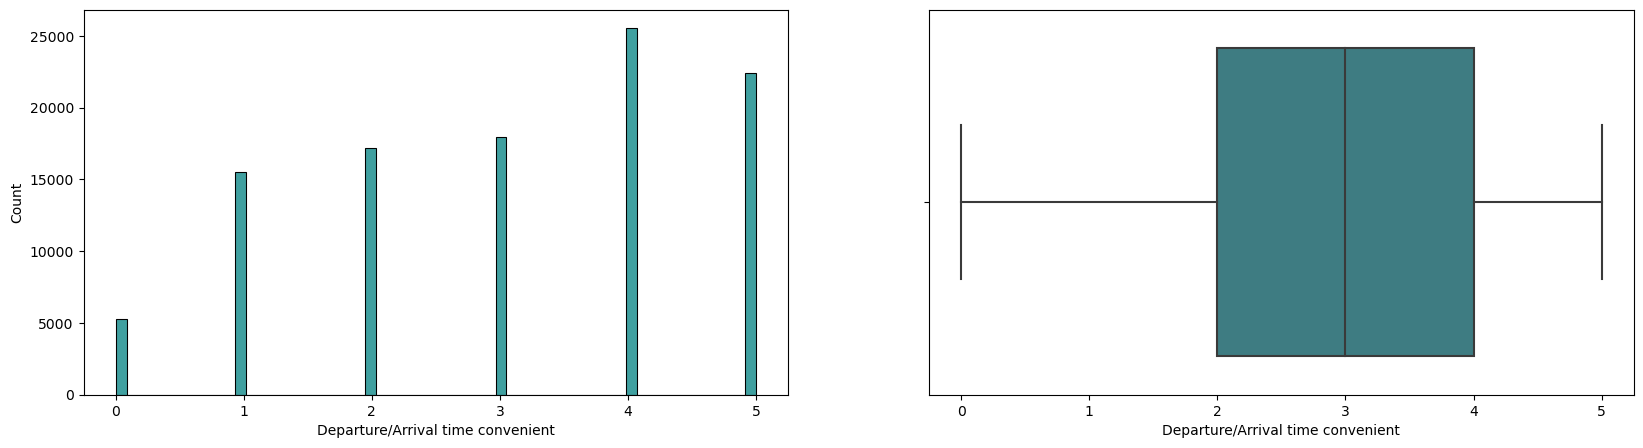

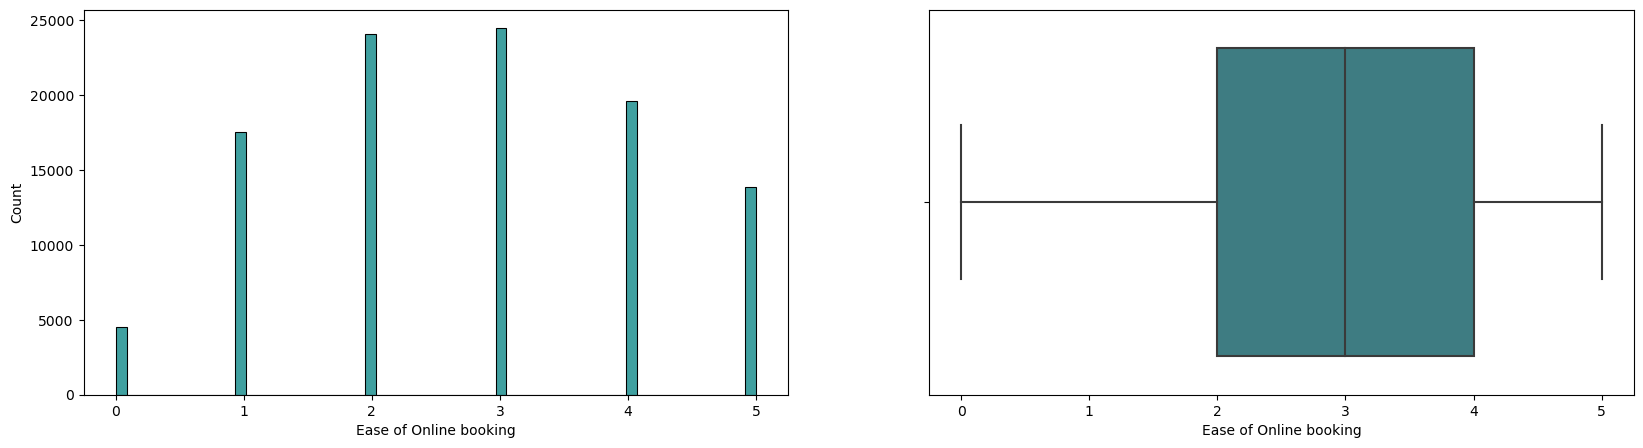

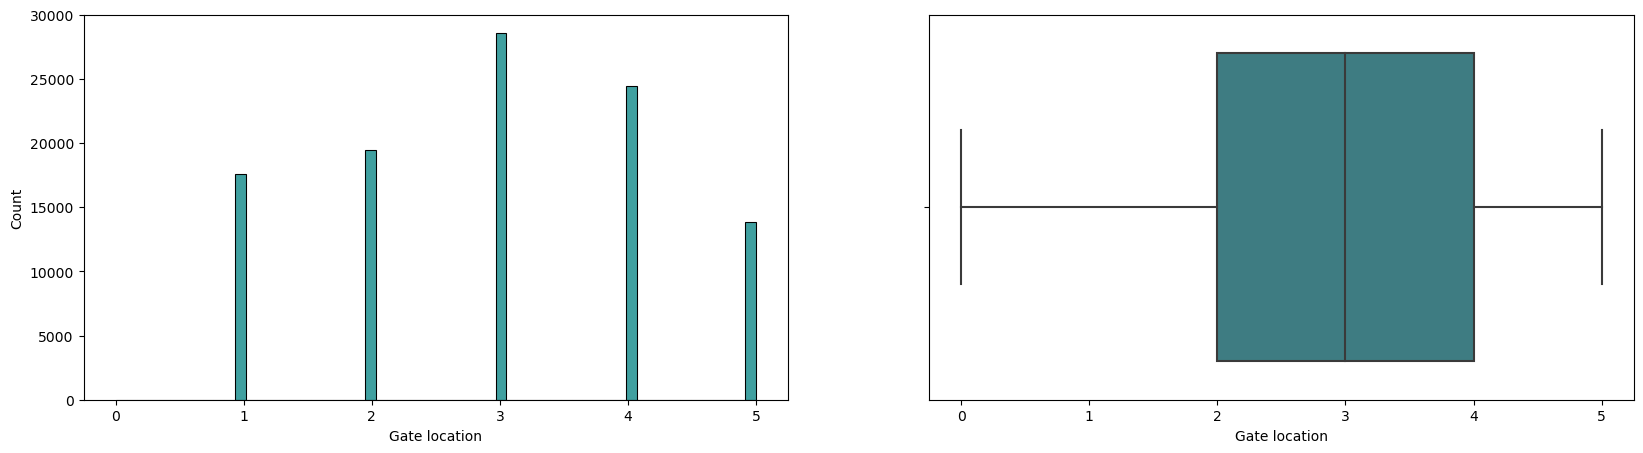

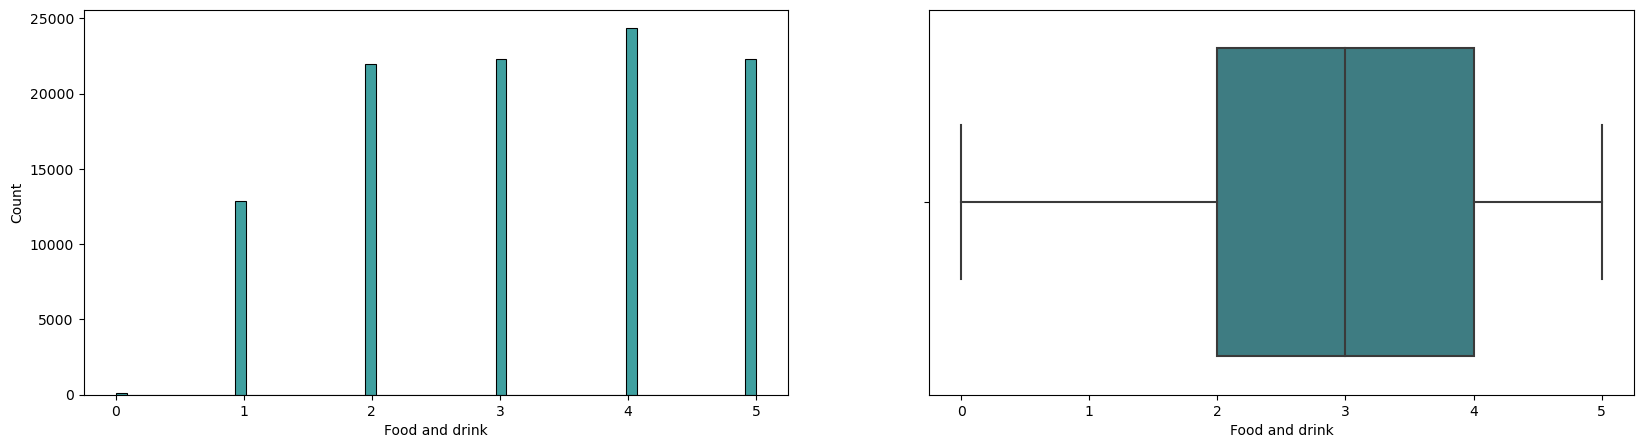

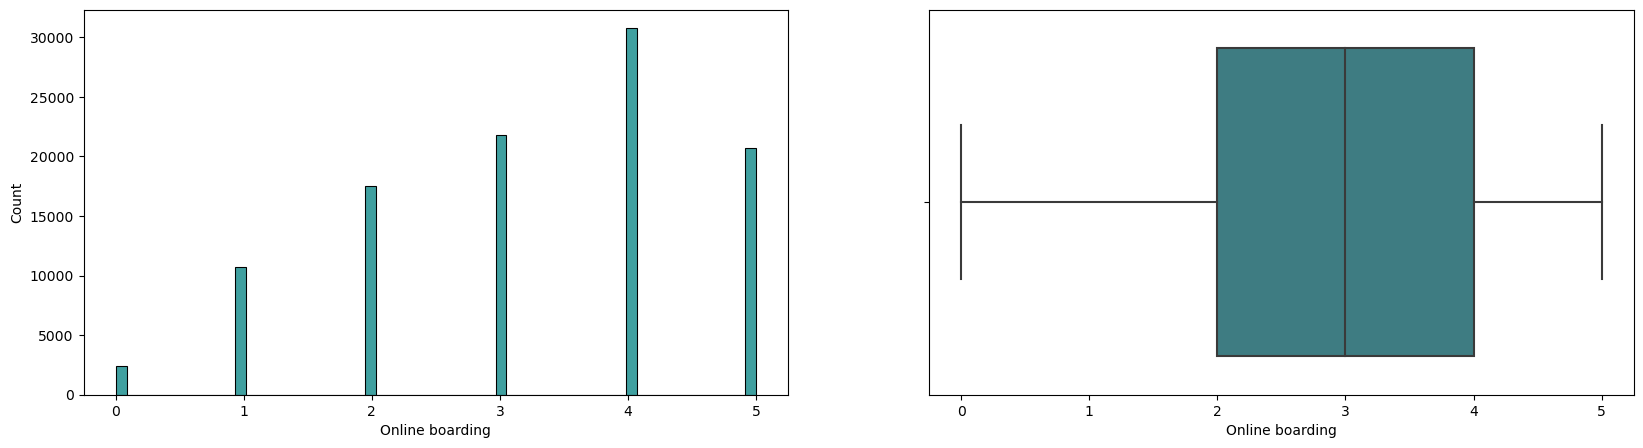

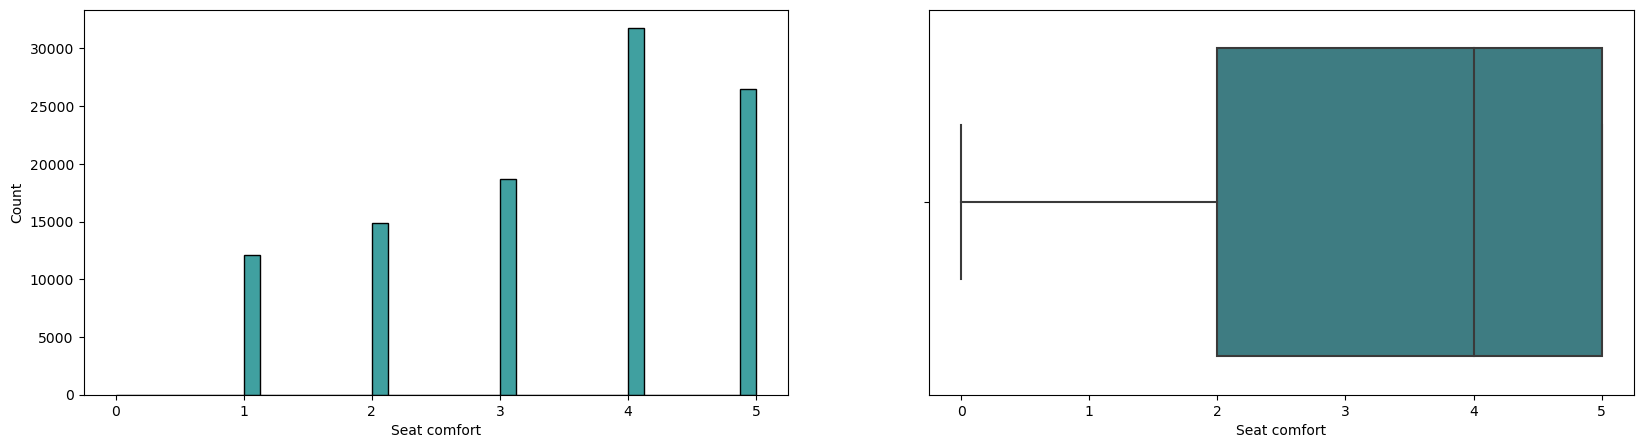

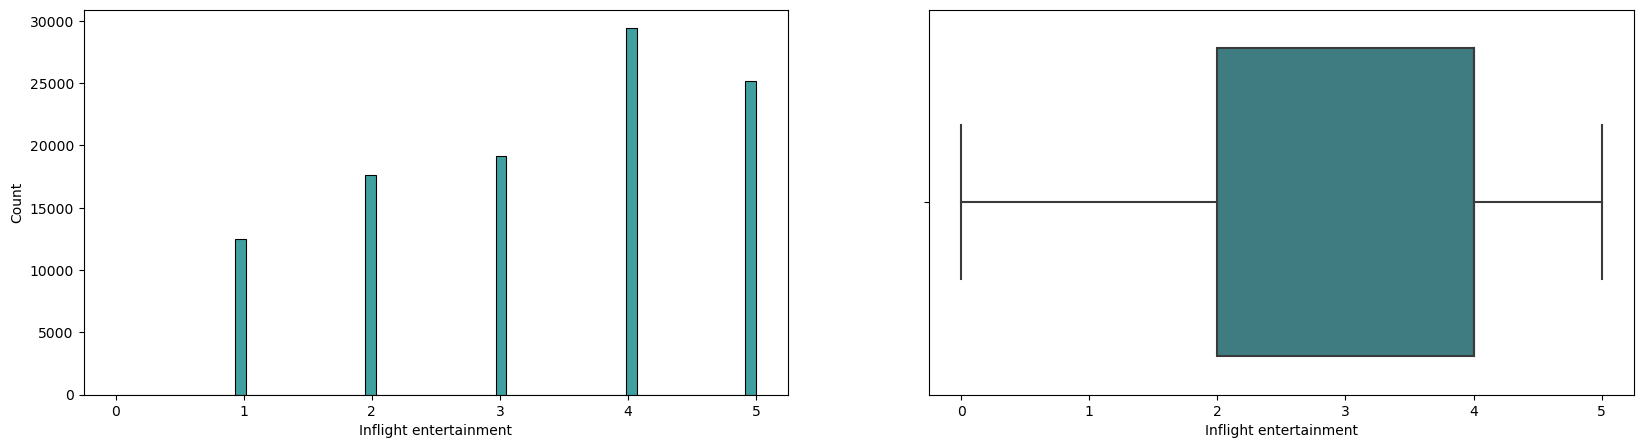

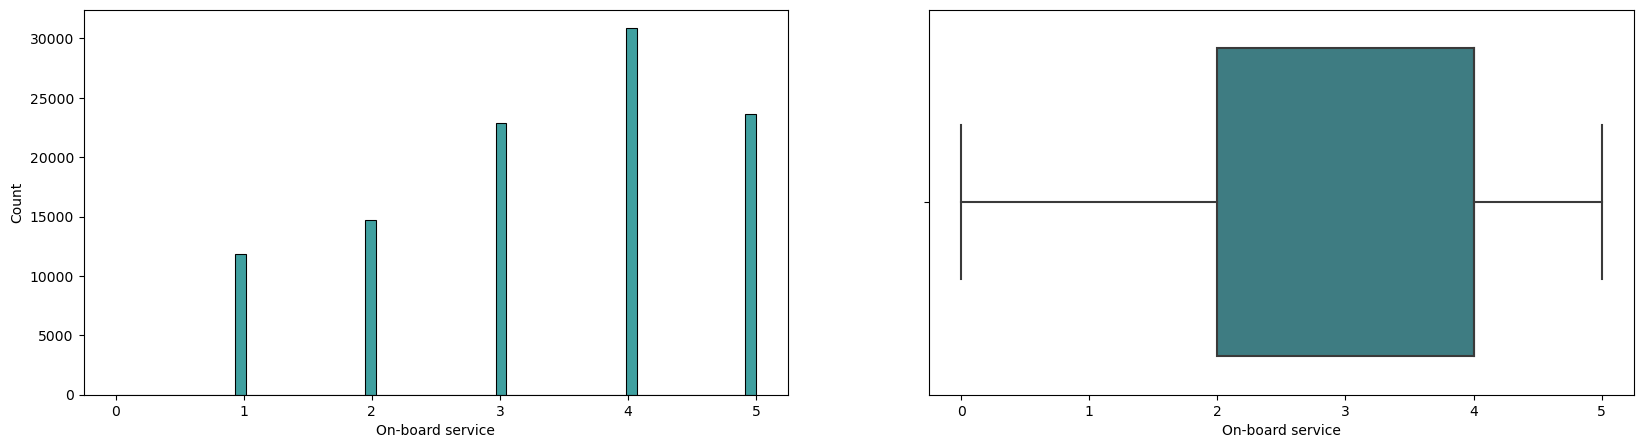

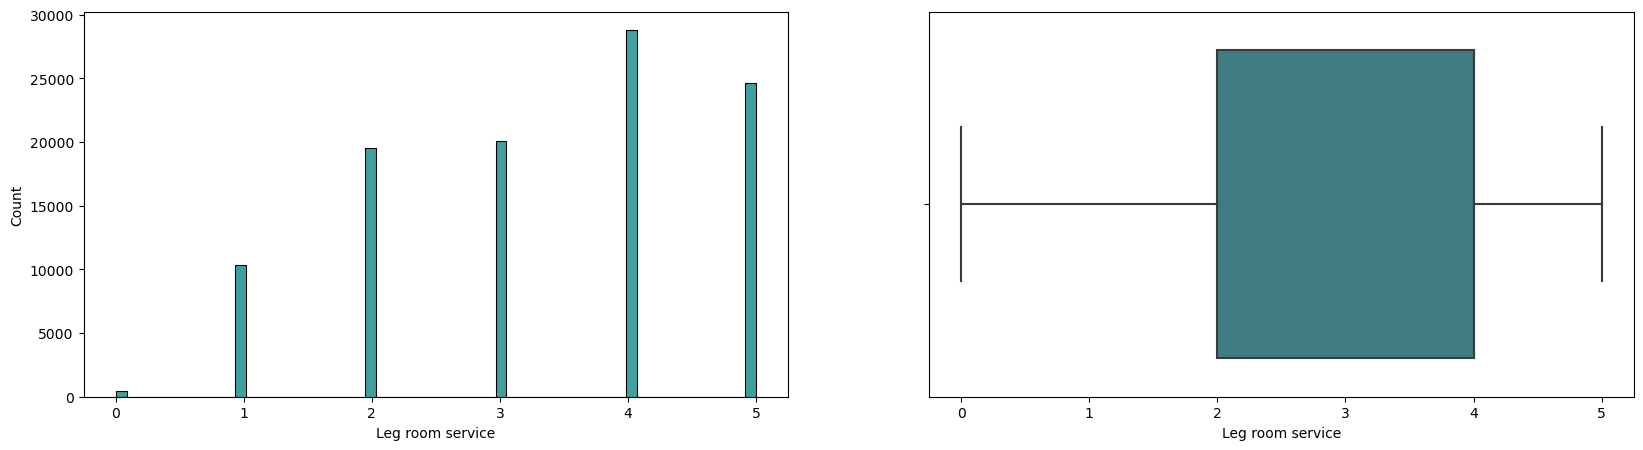

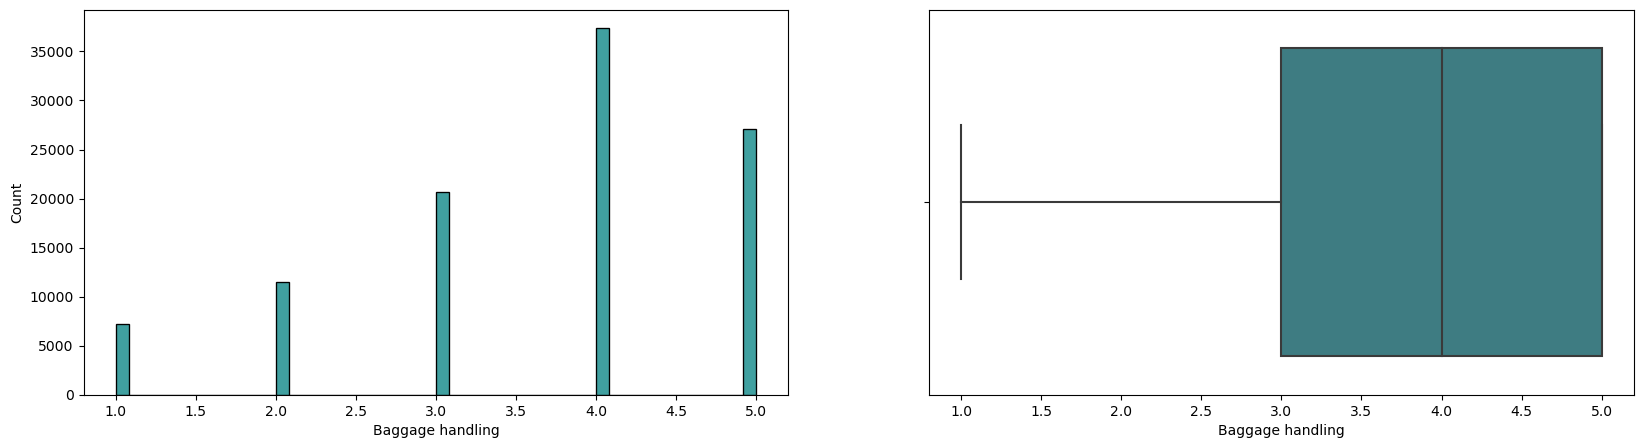

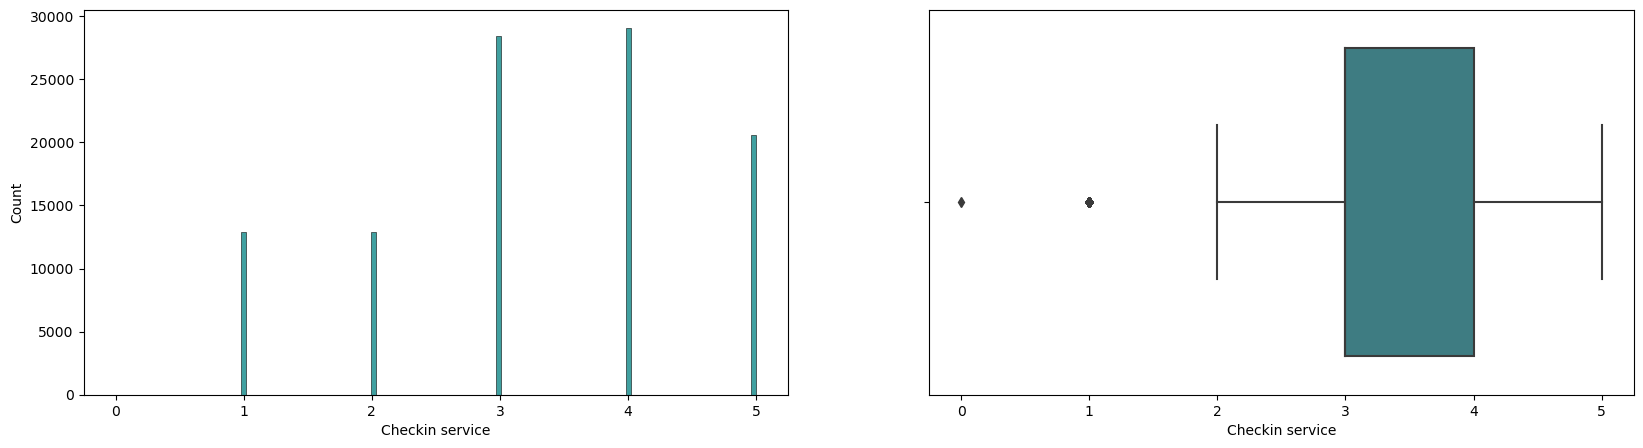

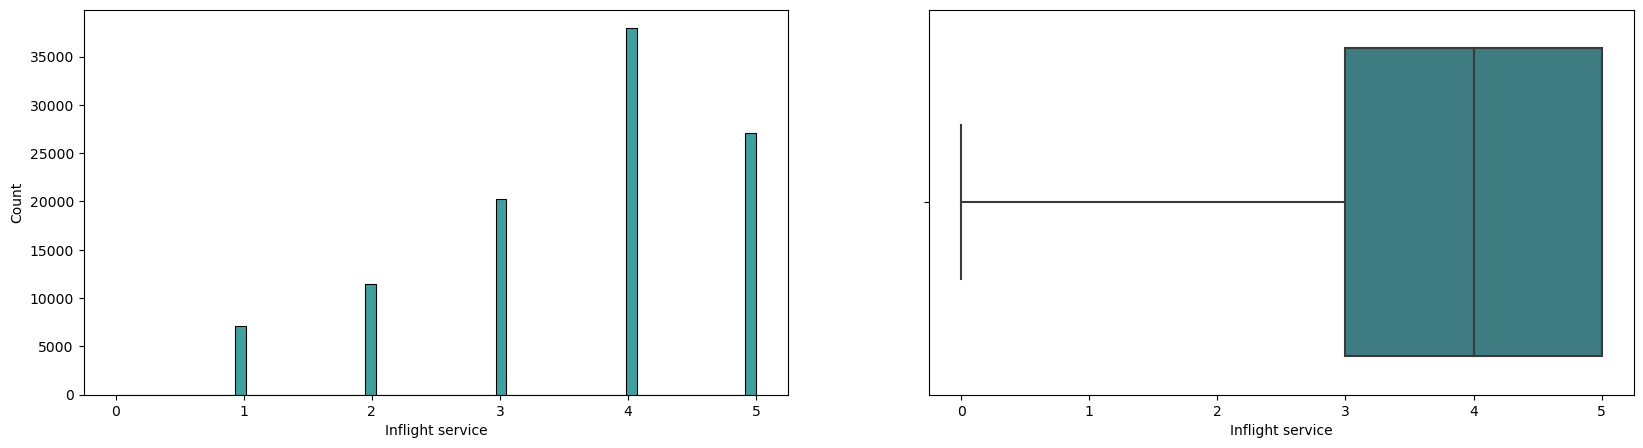

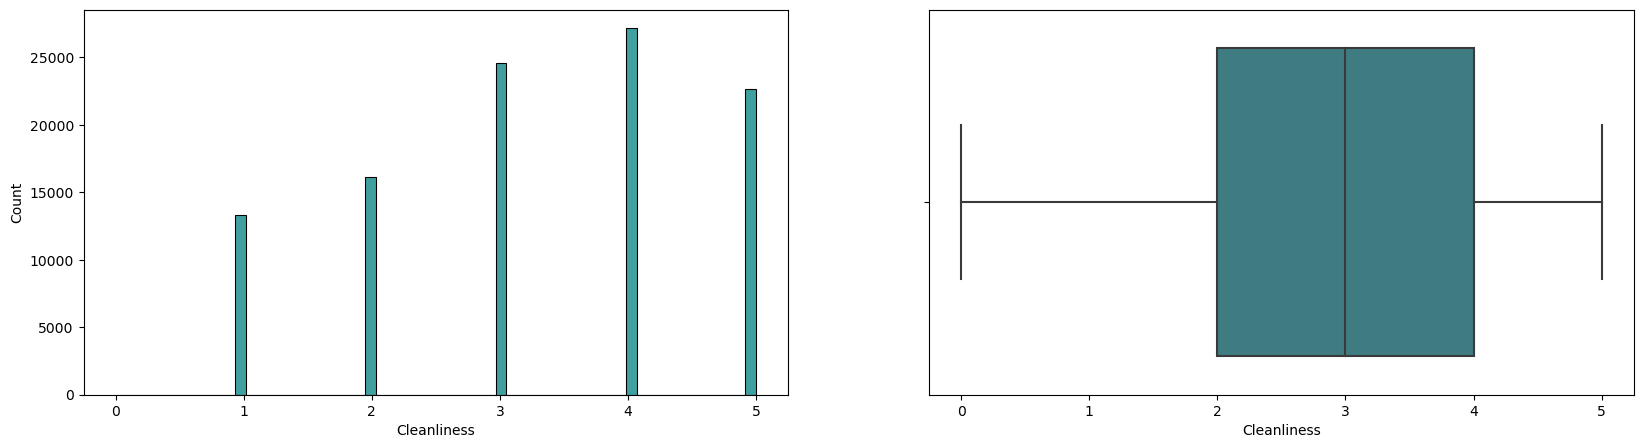

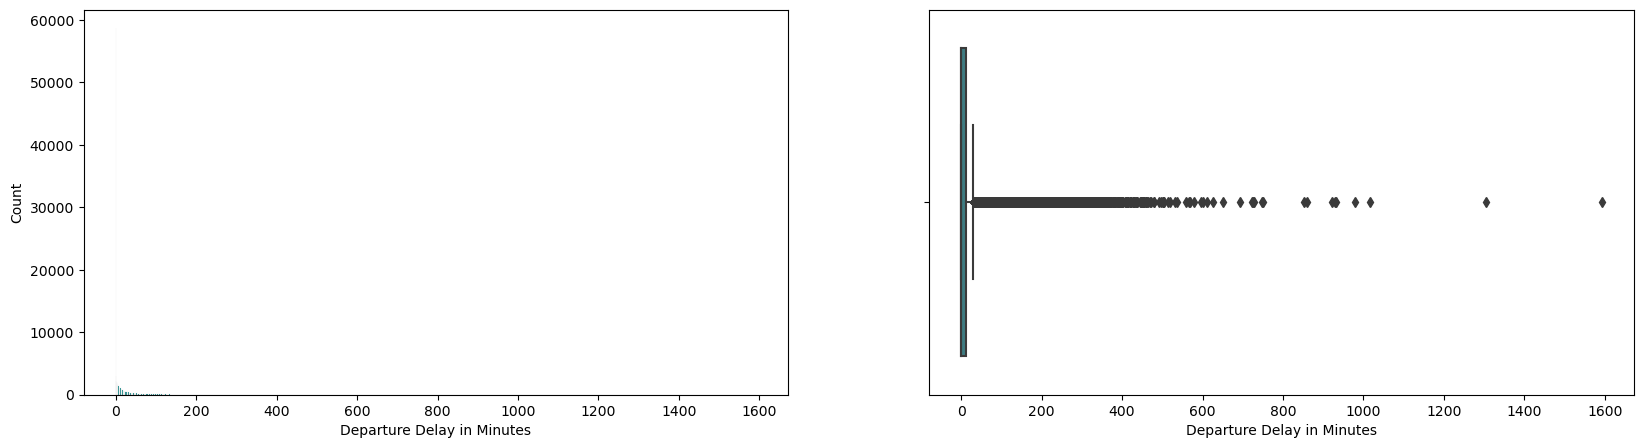

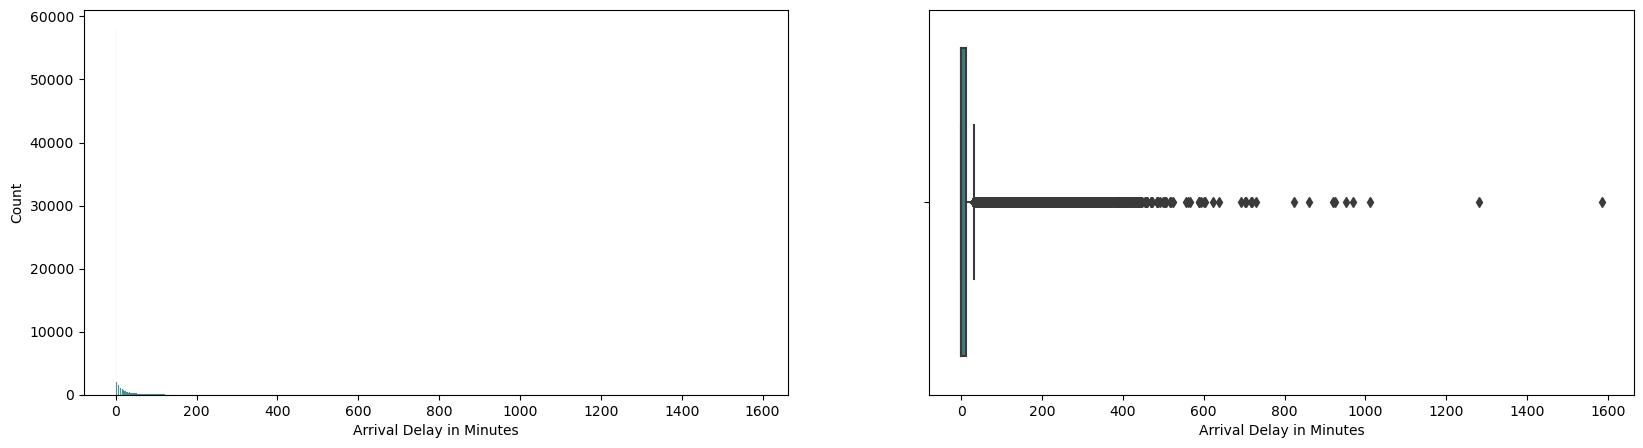

In [15]:
# Plot detailed histogram and box plot

# drop both "SB" and "id" column as they do not add value to the model  (running nos)
num_columns.remove("SN")
num_columns.remove("id")

# Iterate through the refined column list and plot histogram and box plot
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(airline_df[col], ax = ax[0], color= 'teal')
    sns.boxplot(x = airline_df[col], ax= ax[1], palette= 'crest')

<Axes: xlabel='Departure Delay in Minutes'>

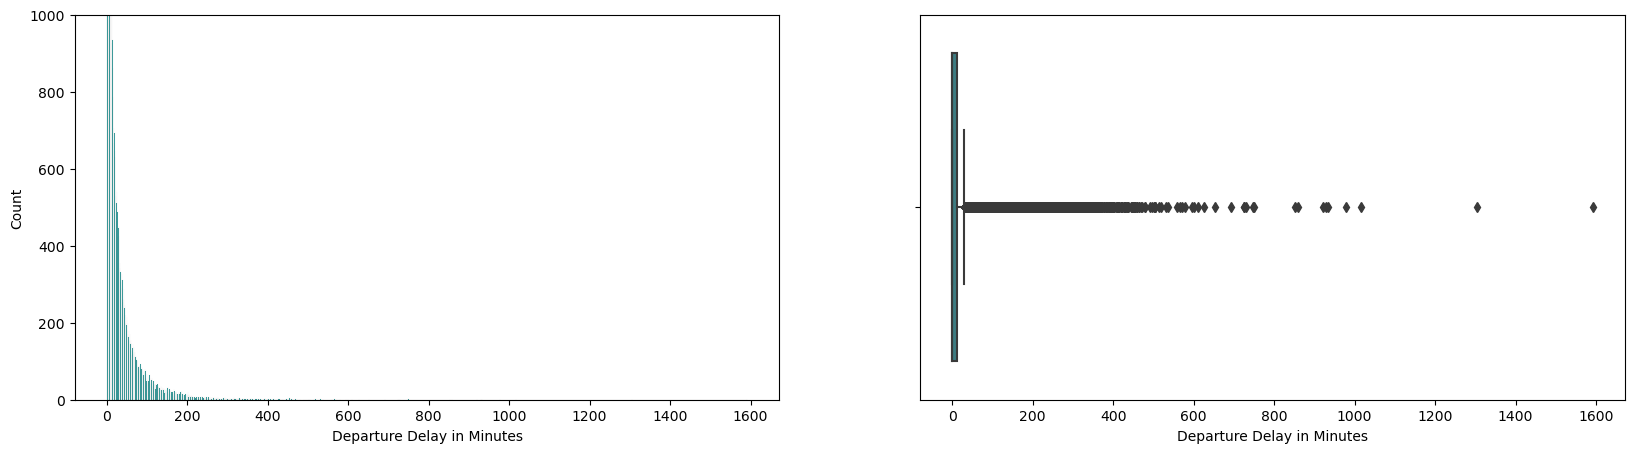

In [16]:
# Plot "Departure Delay in Minutes"  with limited range values for clarity
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.histplot(airline_df["Departure Delay in Minutes"], ax = ax[0], color= 'teal')
ax[0].set_ylim(0,1000)
sns.boxplot(x = airline_df["Departure Delay in Minutes"], ax= ax[1], palette= 'crest')

<Axes: xlabel='Arrival Delay in Minutes'>

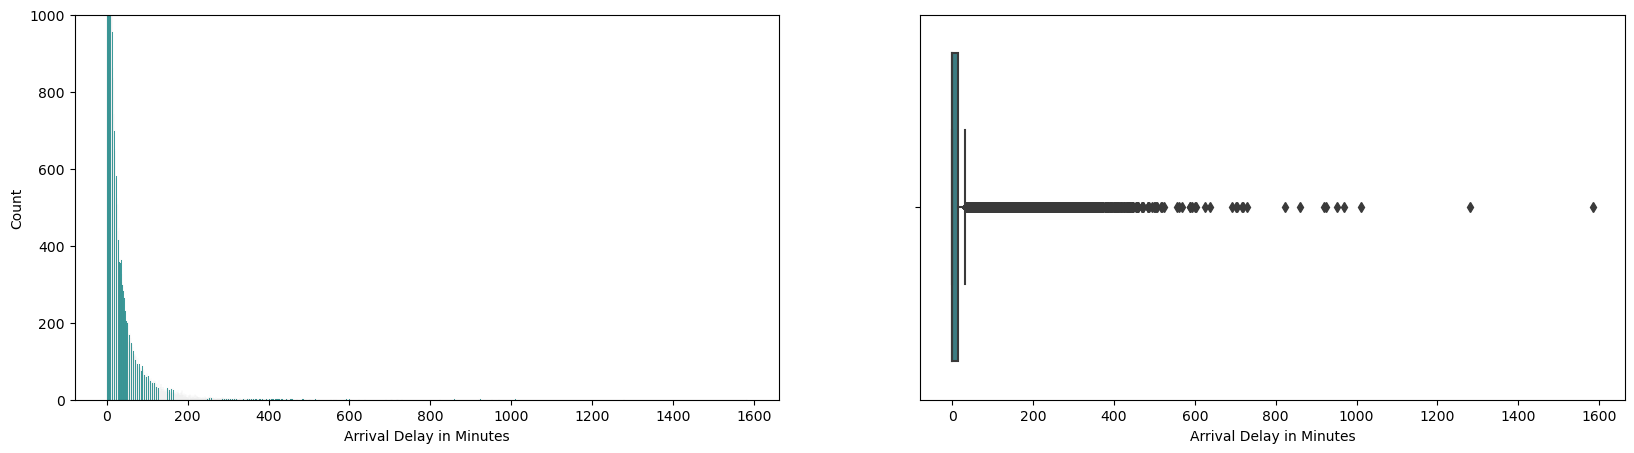

In [17]:
# Plot "Arrival Delay in Minutes"  with limited range values for clarity
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.histplot(airline_df["Arrival Delay in Minutes"], ax = ax[0], color= 'teal')
ax[0].set_ylim(0,1000)
sns.boxplot(x = airline_df["Arrival Delay in Minutes"], ax= ax[1], palette= 'crest')

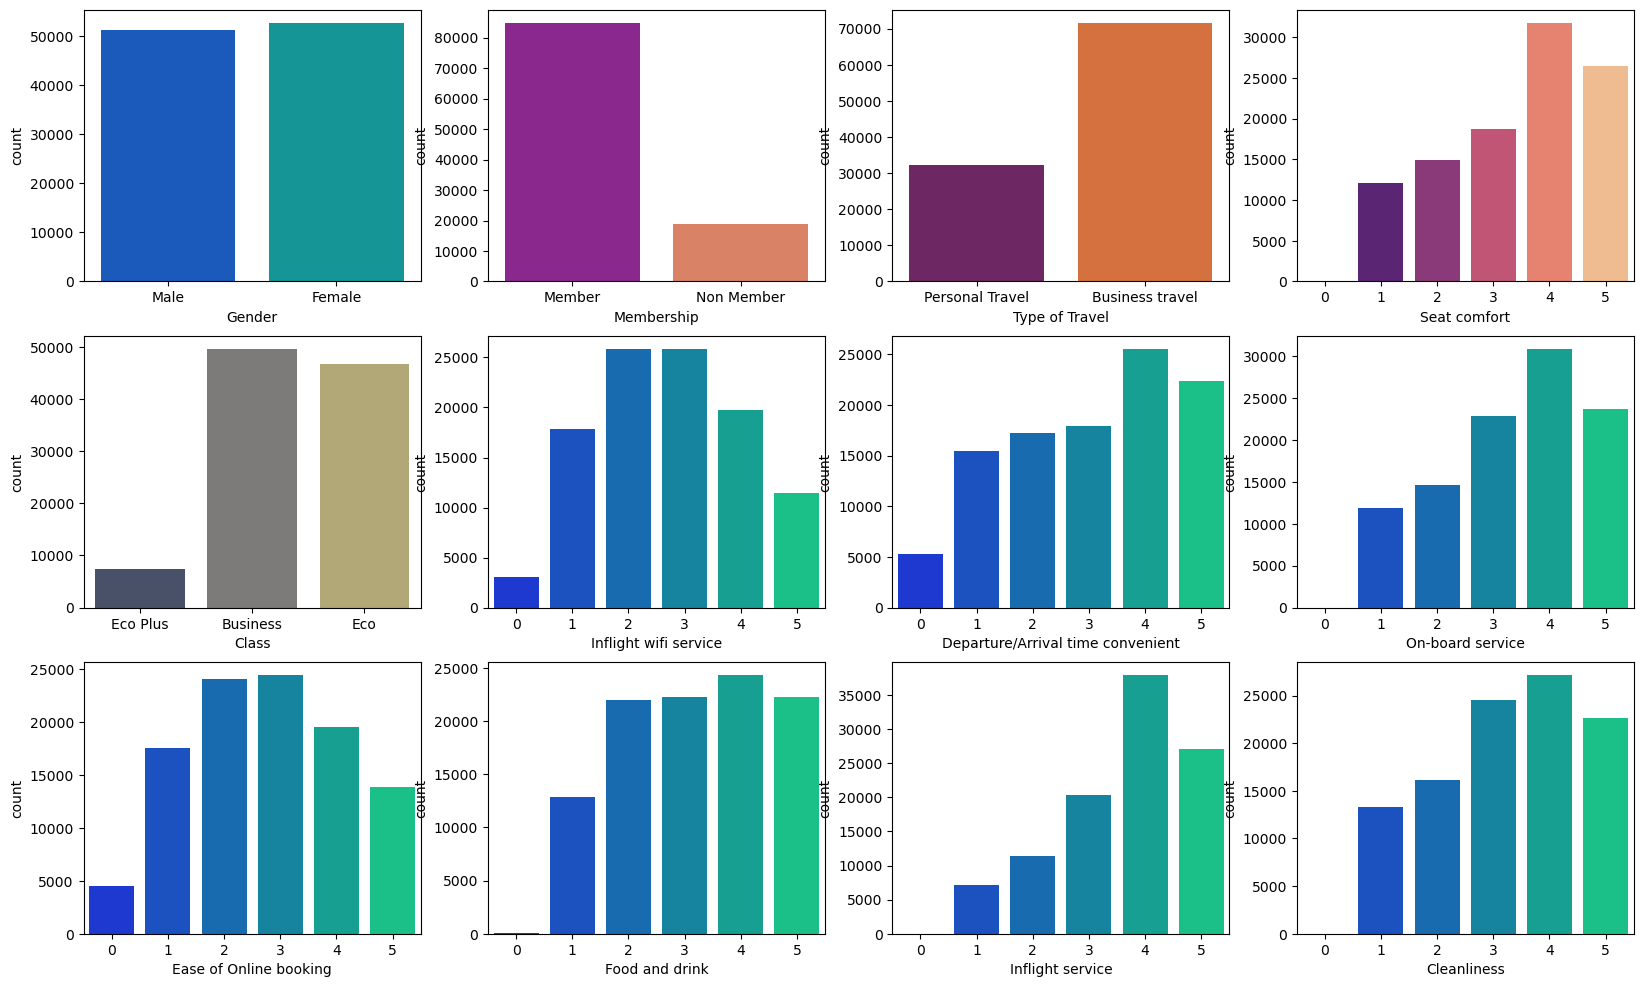

In [18]:
# Plot Demographic and key questionaire inputs to understand the feedback distribution among the values and ratings
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = airline_df, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Membership', data = airline_df, palette= 'plasma', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = airline_df, palette= 'inferno', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = airline_df, palette= 'magma', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = airline_df, palette= 'cividis', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = airline_df, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = airline_df, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = airline_df, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = airline_df, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = airline_df, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = airline_df, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = airline_df, palette= 'winter', ax = axes[2, 3]);

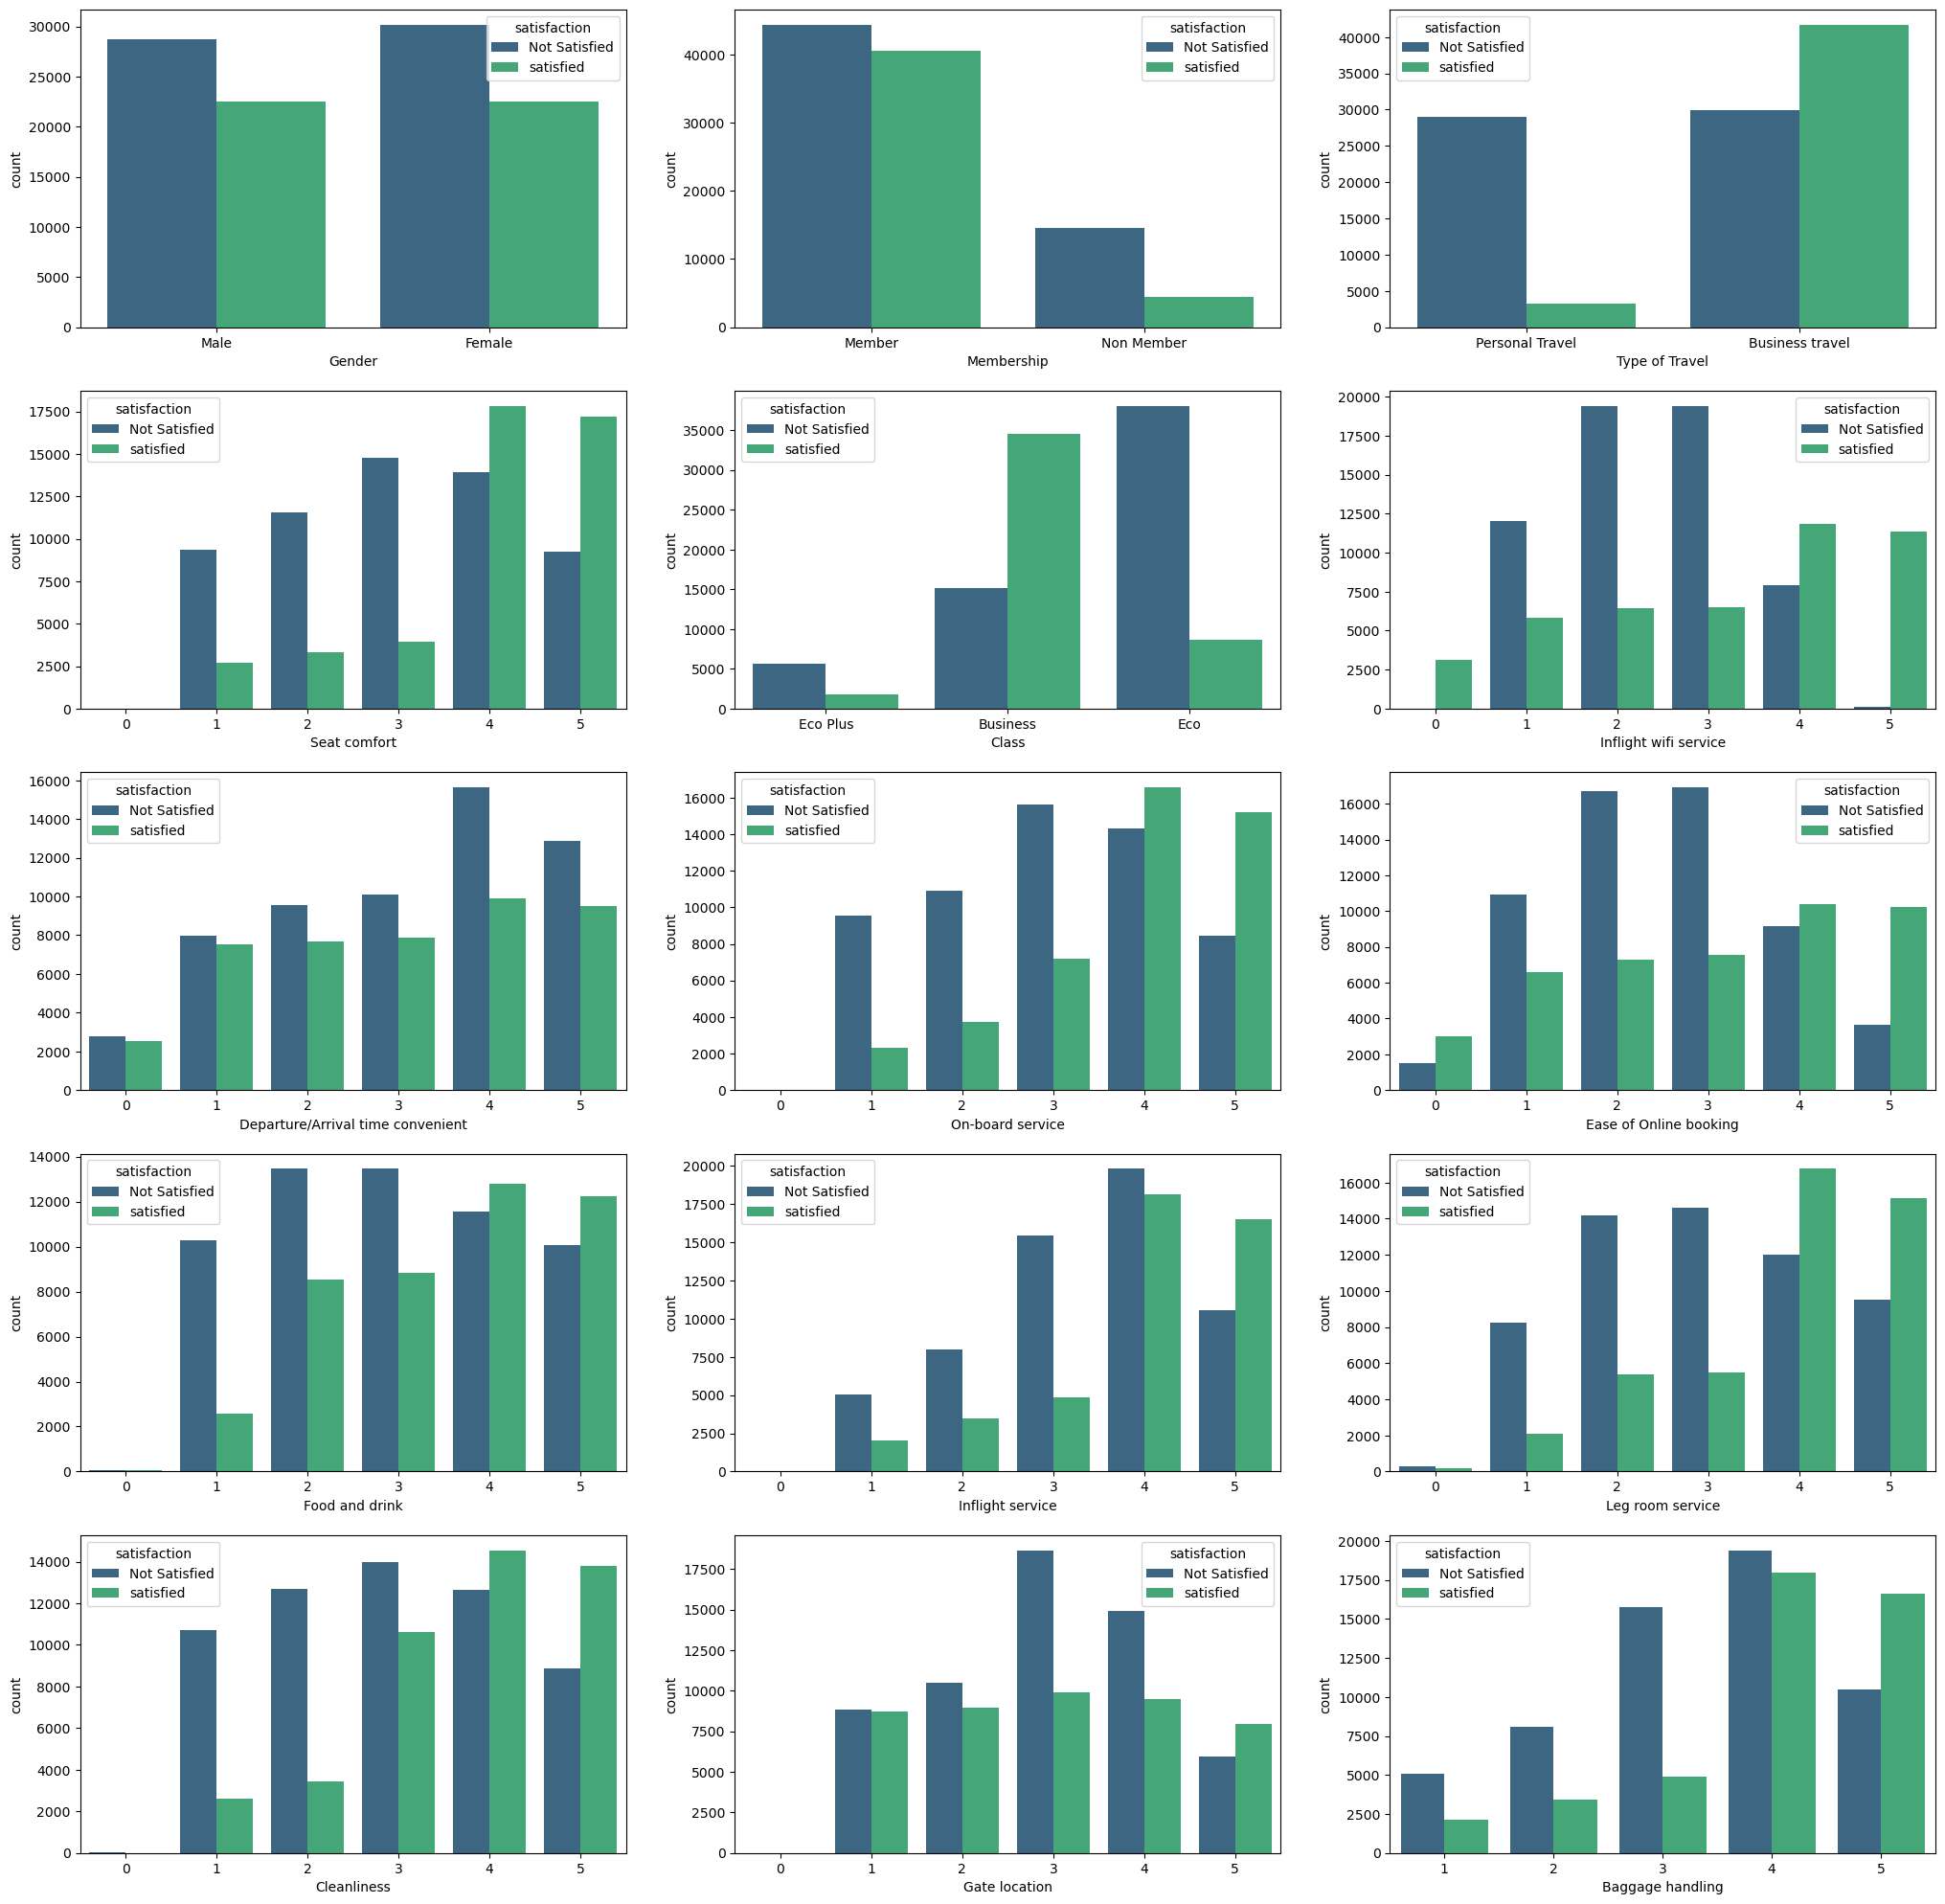

In [19]:
# Plot Demographic and key questionaire inputs to understand the feedback distribution among the values and ratings 
# with respect to the target variable
fig, axes = plt.subplots(5, 3, figsize = (25, 25))
sns.countplot(x = 'Gender', data = airline_df, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Membership', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Leg room service', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2]);
sns.countplot(x = 'Cleanliness', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[4, 0]);
sns.countplot(x = 'Gate location', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[4, 1]);
sns.countplot(x = 'Baggage handling', data = airline_df, hue= 'satisfaction',  palette= 'viridis', ax = axes[4, 2]);

In [20]:
# To aid Data cleaning 
# Filter rows where 'Arrival Delay in Minutes' is null and 'satisfaction' is 'satisfied'
satisfied_null_arrival_delay = airline_df[(airline_df['Arrival Delay in Minutes'].isnull()) & (airline_df['satisfaction'] == 'satisfied')]

# Count the number of such records
satisfied_null_arrival_delay_count = satisfied_null_arrival_delay.shape[0]
satisfied_null_arrival_delay_count

128

In [21]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SN                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Membership                         103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039


---------------------------
---------------------------
# Milestone 4 - Week 9 - Pre-porcessing , Data cleaning and Model builing #
-----------------------------
-----------------------------

**Data has categorical columns hence need to be encoded.  Each categorical value will converted to numbers base on total unique values each categorical column has**

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode training data categorical features
train_label_encoders = {}
for column in airline_df.select_dtypes(include=['object']).columns:
    lab_enc = LabelEncoder()
    airline_df[column] = lab_enc.fit_transform(airline_df[column])
    train_label_encoders[column] = lab_enc

In [23]:
# Drop SN and id column as they do not add any value
airline_df = airline_df.drop(['SN', 'id'], axis=1)

In [24]:
# Replace missing values in "Arrival Delay in Minutes" feature with 0
airline_df['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [25]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Membership                         103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

**Since test data is available seperately,  need to encode the same**


In [26]:
# Encode training data categorical features
test_label_encoders = {}
for column in test_df.select_dtypes(include=['object']).columns:
    test_lab_enc = LabelEncoder()
    test_df[column] = test_lab_enc.fit_transform(test_df[column])
    test_label_encoders[column] = lab_enc

In [27]:
# Drop SN and id column as they do not add any value
test_df = test_df.drop(['SN', 'id'], axis=1)

In [28]:
# Replace missing values in "Arrival Delay in Minutes" feature with 0
test_df['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int32  
 1   Membership                         25976 non-null  int32  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int32  
 4   Class                              25976 non-null  int32  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

#### Segratgate Training and test data into X_train, Y_train,  X_test and y_test (dependent and target variables) ####

In [30]:
# Define features and target for Training data
X_train = airline_df.drop(columns='satisfaction')
y_train = airline_df['satisfaction']


In [31]:
# Define features and target for Training data
X_test = test_df.drop(columns='satisfaction')
y_test = test_df['satisfaction']

**Standardize values to level them to a common scale**

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Declare common function to calculate and print evaluation metrics**
The following metrics are calculated and printed
- **Precision** - Measures the proportion of true positive predictions among all positive predictions, indicating how many selected items are relevant
- **Recall** : Measures the proportion of true positive predictions among all actual positive instances, indicating how many relevant items are selected
- **F1 score**: Harmonic mean of precision and recall, balancing both to provide a single metric that considers both false positives and false negatives
- **Accuracy**: The ratio of correctly predicted instances to the total instances, measuring the overall effectiveness of a classification model.
- **Coefficient Matrix**: Represents the weights or coefficients assigned to each feature in linear models, indicating the strength and direction of the relationship between each feature and the target variable.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Evlaute model and return, Accuracy, Confusion matrix, classification report,  Precision, Recall, and F1-score 
def evaluate_model_and_print(model_nm, y_test_data,  y_pred_data):
    # Calculate all the metrics
    precision          = precision_score(y_test_data, y_pred_data, average=None)
    recall             = recall_score(y_test_data, y_pred_data, average=None)
    f1                 = f1_score(y_test_data, y_pred_data, average=None)
    accuracy           = accuracy_score(y_test_data, y_pred_data)
    classification_rep = classification_report(y_test_data, y_pred_data)
    conf_matrix        = confusion_matrix(y_test_data, y_pred_data)
    # Print the metrics 
    print("="*50)
    print(model_nm, " evaluation metrics")
    print("="*50,"\n")
    print("Precision        : ", precision)
    print("Recall           : ", recall)
    print("F1 Score         : ", f1)
    print("Accuracy         : ", accuracy)
    print("Confusion Matrix : ", conf_matrix, "\n")
    print("="*50)
    return precision, recall, f1, accuracy, classification_rep, conf_matrix





### Training the data using Logistic regression and Evaluating the model ###

In [34]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = logistic_model.predict(X_test)

# Evaluate trained logsitic regression model and print the  metrics
log_precision, log_recall, log_f1, log_accuracy,  \
    log_classification_rep, log_conf_matrix = evaluate_model_and_print("Logistic Regression ", y_test, y_pred_log)




Logistic Regression   evaluation metrics

Precision        :  [0.87309611 0.86783658]
Recall           :  [0.90077541 0.83267561]
F1 Score         :  [0.88671981 0.84989259]
Accuracy         :  0.8708808130582075
Confusion Matrix :  [[13127  1446]
 [ 1908  9495]] 



### Training the data using Decision Tree Classifier and Evaluating the model ###

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate trained Decision Tree classifier model and print the  metrics
dt_precision, dt_recall, dt_f1, dt_accuracy,  \
    dt_classification_rep, dt_conf_matrix = evaluate_model_and_print("Decision Tree Classifier ", y_test, y_pred_dt)

Decision Tree Classifier   evaluation metrics

Precision        :  [0.95382395 0.93942047]
Recall           :  [0.95251492 0.94106814]
F1 Score         :  [0.95316899 0.94024358]
Accuracy         :  0.9474899907607022
Confusion Matrix :  [[13881   692]
 [  672 10731]] 



### Training the data using Random Forest Classifier and Evaluating the model ###

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=500, n_jobs=-1)
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate trained Random Forst classifier  model and print the  metrics
rf_precision, rf_recall, rf_f1, rf_accuracy,  \
    rf_classification_rep, rf_conf_matrix = evaluate_model_and_print("Random Forest Classifier ", y_test, y_pred_rf)

Random Forest Classifier   evaluation metrics

Precision        :  [0.95611684 0.97266968]
Recall           :  [0.97927674 0.94255898]
F1 Score         :  [0.96755822 0.95737763]
Accuracy         :  0.9631582999692023
Confusion Matrix :  [[14271   302]
 [  655 10748]] 



### Training the data using XGBoost and Evaluating the model ###

In [37]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=500)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate trained XGBoost Classifier  model and print the  metrics
xgb_precision, xgb_recall, xgb_f1, xgb_accuracy,  \
    xgb_classification_rep, xgb_conf_matrix = evaluate_model_and_print("XGBoost Classifier ", y_test, y_pred_xgb)

XGBoost Classifier   evaluation metrics

Precision        :  [0.95839785 0.96978689]
Recall           :  [0.97694366 0.94580374]
F1 Score         :  [0.96758189 0.95764518]
Accuracy         :  0.9632737911918694
Confusion Matrix :  [[14237   336]
 [  618 10785]] 



- As the XGB boost and Randon forest accuracy ,  Precision, F1 score , Recall and Confusion matrix values are close, trying to find optimal hyper parameter values for XGBoost 

### Finding the optimal values through RandomizedSearchCV and using the optimum XGBoost hyper parameters to train  the model ###

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost classifier
xgb = XGBClassifier( eval_metric='logloss', random_state=500)

# Set up Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Focus on optimizing for accuracy
    cv=3,
    verbose=1,
    random_state=500,
    n_jobs=-1
)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Best parameters from random search
best_params = random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [39]:
best_params

{'subsample': 1.0,
 'n_estimators': 150,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [40]:
# Train XGBoost model with the best parameters on the  training set
optimized_xgb_model = XGBClassifier(**best_params, eval_metric='logloss', random_state=500)
optimized_xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb_opt = optimized_xgb_model.predict(X_test)

# Evaluate trained optimum XGBoost Classifier  model and print the  metrics
xgb_opt_precision, xgb_opt_recall, xgb_opt_f1, xgb_opt_accuracy,  \
    xgb_opt_classification_rep, xgb_opt_conf_matrix = evaluate_model_and_print("XGBoost Classifier Optimized", y_test, y_pred_xgb_opt)

XGBoost Classifier Optimized  evaluation metrics

Precision        :  [0.95845916 0.9737246 ]
Recall           :  [0.98003157 0.94571604]
F1 Score         :  [0.96912533 0.95951597]
Accuracy         :  0.9649676624576532
Confusion Matrix :  [[14282   291]
 [  619 10784]] 



- From the optimum XGBoost trained model,  see slight increase in accuracy and reduced False Positive cases and increased True Positive cases

### Summarize the Trained model evaluation metrics ###

**Define methods to print the evaluation metrics in a table stricture**

In [41]:
# A function that recieves the precision, Recall,  F12 score and Model alogorithm details to print the heading and values
def print_results(mdl_nm, precision, recall, f1, accuracy, classification_rep, conf_matrix, print_hd ):
    
    # Declare headings except moodel name in a list to iterate and print
    headings = ["Precision-1", "Precision-2", "Recall-1", "Recall-2", "F1 Score-1", "F1 Score-2", "Accuracy" ]
    
    # Collate Precision ,  Recall and F1 Score values  in a list to iterate and print
    values = [precision[0], precision[0], recall[0], recall[1],  f1[0], f1[1],  accuracy]
        
    fixed_width = 12
    
    #Print Heading  if set to True
    if(print_hd):
        model_nm_hdng = " Model Name "
        formatted_hdn_row = "|".join(value.center(fixed_width) for value in headings)
        formatted_hdn_row = model_nm_hdng.center(30) + "|" +  formatted_hdn_row
        print("-"*123)
        print(f"|{formatted_hdn_row}|") 
        print("-"*123)
        
    # print values 
    formatted_val_row = "|".join(f"{value:.2f}".center(fixed_width) for value in values)
    formatted_val_row = mdl_nm.ljust(30)+ "|" +  formatted_val_row
    print(f"|{formatted_val_row}|")
        

        
# A function that recieves the Confusion matrix and Model alogorithm details to print the heading and values
def print_confusion_matrix(mdl_nm, conf_matrix, print_hd):
    
    # Declare headings except moodel name in a list to iterate and print
    headings = ["True Positive", "False Negative", "False Positive", "True Negative"]
    
    # Collate confusion matrix values  in a list to iterate and print
    values = [conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1] ]
    
    fixed_width = 14
    
    #Print Heading if set to True    
    if(print_hd):    
        model_nm_hdng = " Model Name "
        formatted_hdn_row = "|".join(value.center(fixed_width) for value in headings)
        formatted_hdn_row = model_nm_hdng.center(30) + "|" +  formatted_hdn_row
        print("-"*92)
        print(f"|{formatted_hdn_row}|")
        print("-"*92)
    
    # print values 
    formatted_val_row = "|".join(f"{value:}".rjust(fixed_width) for value in values)
    formatted_val_row = mdl_nm.ljust(30)+ "|" +  formatted_val_row
    print(f"|{formatted_val_row}|")


In [42]:
print_results("Logistic Regression", log_precision, log_recall, log_f1, log_accuracy,  \
    log_classification_rep, log_conf_matrix, True)

print_results("Decision Tree Classifier", dt_precision, dt_recall, dt_f1, dt_accuracy,  \
    dt_classification_rep, dt_conf_matrix, False)

print_results("Random Forest Classifier", rf_precision, rf_recall, rf_f1, xgb_accuracy,  \
    rf_classification_rep, rf_conf_matrix, False)

print_results("XGBoost Classifier", xgb_precision, xgb_recall, xgb_f1, xgb_accuracy,  \
    xgb_classification_rep, xgb_conf_matrix, False)

print_results("XGBoost Classifier Optimized", xgb_opt_precision, xgb_opt_recall, xgb_opt_f1, xgb_opt_accuracy,  \
    xgb_opt_classification_rep, xgb_opt_conf_matrix, False)

print("-"*123)
print("**Note:  1 and 2  indicates the precision, recall ad F1 score for two target classifier 'Not Satisfied' and 'Satisfied' \n")

print_confusion_matrix("Logistic Regression",  log_conf_matrix, True)

print_confusion_matrix("Decision Tree Classifier", dt_conf_matrix, False)

print_confusion_matrix("Random Forest Classifier",  rf_conf_matrix, False)

print_confusion_matrix("XGBoost Classifier", xgb_conf_matrix, False)

print_confusion_matrix("XGBoost Classifier Optimized",  xgb_opt_conf_matrix, False)
print("-"*92)

print()



---------------------------------------------------------------------------------------------------------------------------
|          Model Name          |Precision-1 |Precision-2 |  Recall-1  |  Recall-2  | F1 Score-1 | F1 Score-2 |  Accuracy  |
---------------------------------------------------------------------------------------------------------------------------
|Logistic Regression           |    0.87    |    0.87    |    0.90    |    0.83    |    0.89    |    0.85    |    0.87    |
|Decision Tree Classifier      |    0.95    |    0.95    |    0.95    |    0.94    |    0.95    |    0.94    |    0.95    |
|Random Forest Classifier      |    0.96    |    0.96    |    0.98    |    0.94    |    0.97    |    0.96    |    0.96    |
|XGBoost Classifier            |    0.96    |    0.96    |    0.98    |    0.95    |    0.97    |    0.96    |    0.96    |
|XGBoost Classifier Optimized  |    0.96    |    0.96    |    0.98    |    0.95    |    0.97    |    0.96    |    0.96    |
--------

### Ensemble of models ####

**As Optimized XGBoostdid not improve much over the Random Forest or base XGBoost,  Use Ensemble method to pass the findings from one model to another**

**Use outputs of Decision Tree into Random Forest and in turn use Random Forest outpus as inputs to XGBoost**

**Decsion Tree ==> Randon Forest ==> XGBoost**

In [43]:
# Define features and target for Training data
X_train = airline_df.drop(columns='satisfaction')
y_train = airline_df['satisfaction']

# Define features and target for Training data
X_test = test_df.drop(columns='satisfaction')
y_test = test_df['satisfaction']


# Step 1: Train the Decision Tree model and get predictions
decision_tree_model_ensbl = DecisionTreeClassifier(random_state=42)
decision_tree_model_ensbl.fit(X_train, y_train)
dt_train_preds = decision_tree_model_ensbl.predict(X_train)
dt_test_preds = decision_tree_model_ensbl.predict(X_test)



# Append Decision Tree predictions as a new feature for Random Forst training
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
X_train_rf['DT_Pred'] = dt_train_preds
X_test_rf['DT_Pred'] = dt_test_preds

# Step 2: Train the Random Forest model using the new feature and get predictions
random_forest_model_ensbl = RandomForestClassifier(random_state=500, n_jobs=-1)
random_forest_model_ensbl.fit(X_train_rf, y_train)
rf_train_preds = random_forest_model_ensbl.predict(X_train_rf)
rf_test_preds = random_forest_model_ensbl.predict(X_test_rf)

# Append Random Forest predictions as a new feature for XGBoost Training
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()
X_train_xgb['RF_Pred'] = rf_train_preds
X_test_xgb['RF_Pred'] = rf_test_preds

# Step 3: Train XGBoost using the updated features
xgb_model_ensbl = XGBClassifier(**best_params, eval_metric='logloss', random_state=500)
xgb_model_ensbl.fit(X_train_xgb, y_train)

# Predict on test set
y_pred_xgb_final = xgb_model_ensbl.predict(X_test_xgb)

# Evaluate model
xgb_fnl_precision, xgb_fnl_recall, xgb_fnl_f1, xgb_fnl_accuracy,  \
    xgb_fnl_classification_rep, xgb_fnl_conf_matrix = evaluate_model_and_print("XGBoost Classifier ", y_test, y_pred_xgb_final)

XGBoost Classifier   evaluation metrics

Precision        :  [0.95381761 0.93925602]
Recall           :  [0.95237768 0.94106814]
F1 Score         :  [0.9530971  0.94016121]
Accuracy         :  0.9474129966122574
Confusion Matrix :  [[13879   694]
 [  672 10731]] 



### Training using Nueral Network, KNN and SVM ###

**As Ensemble method metrics did not neither improve nor close to XGBoost model metrics,  Nueral Network,  KNN and SVM alogorithms are tried**

In [44]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define features and target for Training data
X_train = airline_df.drop(columns='satisfaction')
y_train = airline_df['satisfaction']

# Define features and target for Training data
X_test = test_df.drop(columns='satisfaction')
y_test = test_df['satisfaction']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred_prob = model.predict(X_test)
# Convert the probabilities to 0 or 1 to classify 'satisfied' or 'not satisfied'
y_pred_nn = (y_pred_prob > 0.5).astype(int).flatten()


# Evaluate model
nn_precision, nn_recall, nn_f1, nn_accuracy, nn_classification_rep, \
    nn_conf_matrix = evaluate_model_and_print("Neural Network ", y_test, y_pred_nn)


Epoch 1/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1938 - accuracy: 0.9219 - val_loss: 0.1481 - val_accuracy: 0.9366
Epoch 2/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1364 - accuracy: 0.9436 - val_loss: 0.1228 - val_accuracy: 0.9516
Epoch 3/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1198 - accuracy: 0.9495 - val_loss: 0.1150 - val_accuracy: 0.9498
Epoch 4/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1092 - accuracy: 0.9538 - val_loss: 0.1065 - val_accuracy: 0.9541
Epoch 5/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1025 - accuracy: 0.9560 - val_loss: 0.1010 - val_accuracy: 0.9553
Epoch 6/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.0980 - accuracy: 0.9579 - val_loss: 0.0985 - val_accuracy: 0.9576
Epoch 7/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.0951 - accuracy: 0.9585 - val_loss: 0.0944 - val_accuracy:

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict using KNN
y_pred_knn = knn_model.predict(X_test)


# Evaluate KNN
knn_precision, knn_recall, knn_f1, knn_accuracy, knn_classification_rep, \
    knn_conf_matrix = evaluate_model_and_print("Neural Network ", y_test, y_pred_knn)



Neural Network   evaluation metrics

Precision        :  [0.91552422 0.9484894 ]
Recall           :  [0.96232759 0.88652109]
F1 Score         :  [0.93834264 0.91645891]
Accuracy         :  0.9290498922081922
Confusion Matrix :  [[14024   549]
 [ 1294 10109]] 



In [46]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
svm_precision, svm_recall, svm_f1, svm_accuracy, svm_classification_rep, \
    svm_conf_matrix = evaluate_model_and_print("Neural Network ", y_test, y_pred_svm)

Neural Network   evaluation metrics

Precision        :  [0.95206634 0.95952616]
Recall           :  [0.96905236 0.93764799]
F1 Score         :  [0.96048425 0.94846092]
Accuracy         :  0.9552663997536187
Confusion Matrix :  [[14122   451]
 [  711 10692]] 



In [47]:
print_results("Logistic Regression", log_precision, log_recall, log_f1, log_accuracy,  \
    log_classification_rep, log_conf_matrix, True)

print_results("Decision Tree Classifier", dt_precision, dt_recall, dt_f1, dt_accuracy,  \
    dt_classification_rep, dt_conf_matrix, False)

print_results("Random Forest Classifier", rf_precision, rf_recall, rf_f1, xgb_accuracy,  \
    rf_classification_rep, rf_conf_matrix, False)

print_results("XGBoost Classifier", xgb_precision, xgb_recall, xgb_f1, xgb_accuracy,  \
    xgb_classification_rep, xgb_conf_matrix, False)

print_results("XGBoost Classifier Optimized", xgb_opt_precision, xgb_opt_recall, xgb_opt_f1, xgb_opt_accuracy,  \
    xgb_opt_classification_rep, xgb_opt_conf_matrix, False)

print_results("Nueral Network", nn_precision, nn_recall, nn_f1, nn_accuracy,  \
    nn_classification_rep, nn_conf_matrix, False)

print_results("KNN Nearest Neigbour", knn_precision, knn_recall, knn_f1, knn_accuracy,  \
    knn_classification_rep, knn_conf_matrix, False)

print_results("Support Vector Machine", svm_precision, svm_recall, svm_f1, svm_accuracy,  \
    svm_classification_rep, svm_conf_matrix, False)

print("-"*123)

print("**Note:  1 and 2  indicates the precision, recall ad F1 score for two target classifier 'Not Satisfied' and 'Satisfied' \n")

print_confusion_matrix("Logistic Regression",  log_conf_matrix, True)

print_confusion_matrix("Decision Tree Classifier", dt_conf_matrix, False)

print_confusion_matrix("Random Forest Classifier",  rf_conf_matrix, False)

print_confusion_matrix("XGBoost Classifier", xgb_conf_matrix, False)

print_confusion_matrix("XGBoost Classifier Optimized",  xgb_opt_conf_matrix, False)

print_confusion_matrix("Nueral Network",  nn_conf_matrix, False)

print_confusion_matrix("KNN Nearest Neigbour", knn_conf_matrix, False)

print_confusion_matrix("Support Vector Machine",  svm_conf_matrix, False)


print("-"*92)

print()



---------------------------------------------------------------------------------------------------------------------------
|          Model Name          |Precision-1 |Precision-2 |  Recall-1  |  Recall-2  | F1 Score-1 | F1 Score-2 |  Accuracy  |
---------------------------------------------------------------------------------------------------------------------------
|Logistic Regression           |    0.87    |    0.87    |    0.90    |    0.83    |    0.89    |    0.85    |    0.87    |
|Decision Tree Classifier      |    0.95    |    0.95    |    0.95    |    0.94    |    0.95    |    0.94    |    0.95    |
|Random Forest Classifier      |    0.96    |    0.96    |    0.98    |    0.94    |    0.97    |    0.96    |    0.96    |
|XGBoost Classifier            |    0.96    |    0.96    |    0.98    |    0.95    |    0.97    |    0.96    |    0.96    |
|XGBoost Classifier Optimized  |    0.96    |    0.96    |    0.98    |    0.95    |    0.97    |    0.96    |    0.96    |
|Nueral 

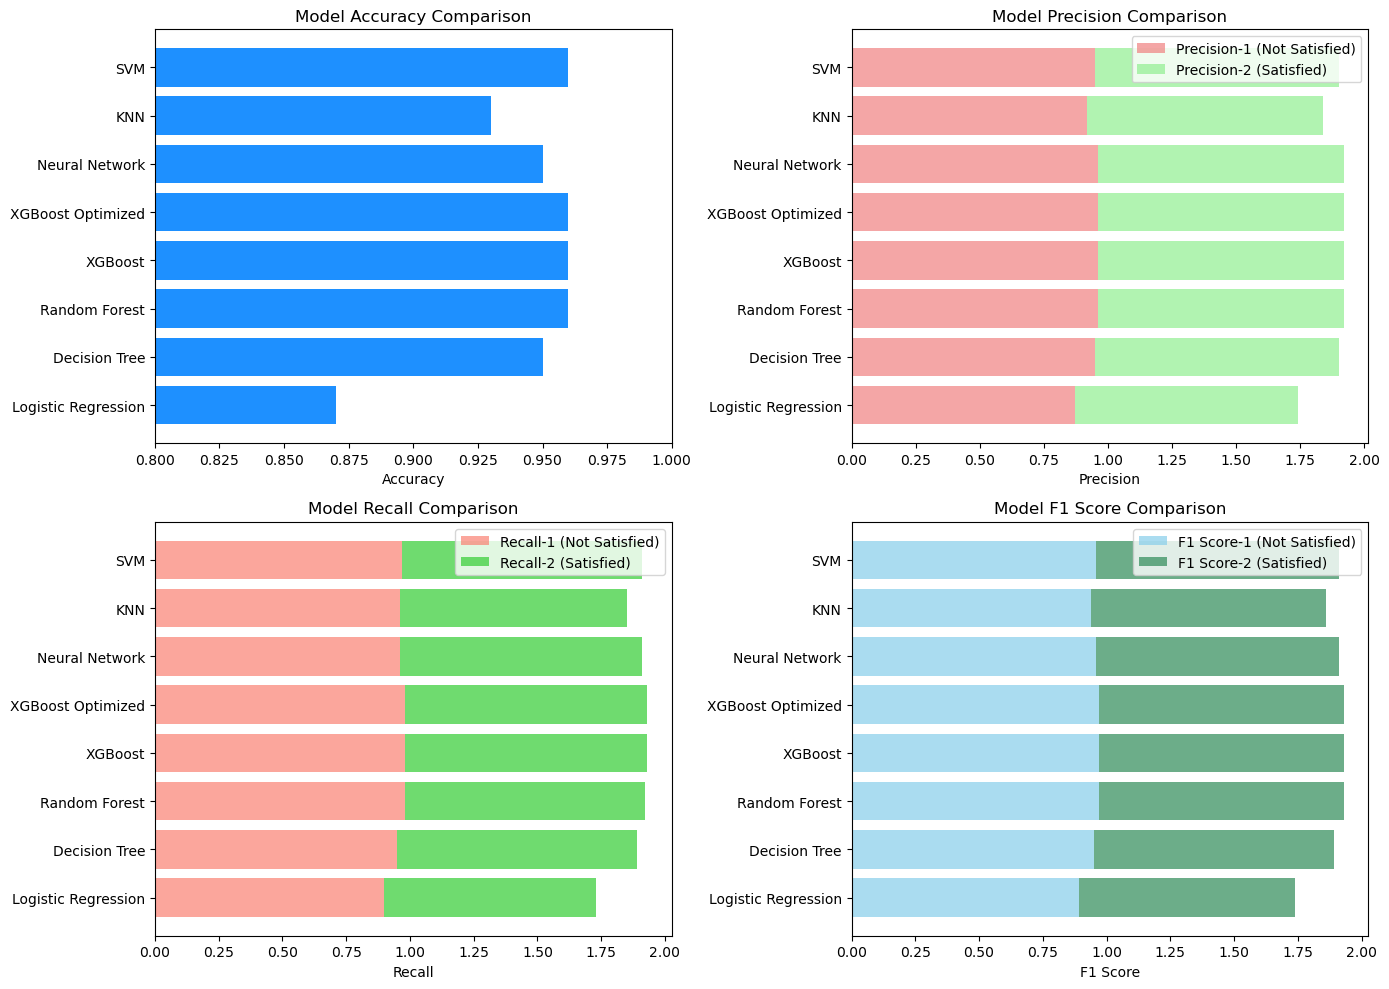

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
    "XGBoost Optimized",
    "Neural Network",
    "KNN",
    "SVM"
]

# Accuracy scores
accuracy_scores = [0.87, 0.95, 0.96, 0.96, 0.96, 0.95, 0.93, 0.96]

# Precision-1 and Precision-2 (for Not Satisfied and Satisfied)
precision_1 = [0.87, 0.95, 0.96, 0.96, 0.96, 0.96, 0.92, 0.95]
precision_2 = [0.87, 0.95, 0.96, 0.96, 0.96, 0.96, 0.92, 0.95]

# Recall-1 and Recall-2 (for Not Satisfied and Satisfied)
recall_1 = [0.90, 0.95, 0.98, 0.98, 0.98, 0.96, 0.96, 0.97]
recall_2 = [0.83, 0.94, 0.94, 0.95, 0.95, 0.95, 0.89, 0.94]

# F1 Score-1 and F1 Score-2 (for Not Satisfied and Satisfied)
f1_score_1 = [0.89, 0.95, 0.97, 0.97, 0.97, 0.96, 0.94, 0.96]
f1_score_2 = [0.85, 0.94, 0.96, 0.96, 0.96, 0.95, 0.92, 0.95]

# Plotting bar charts for comparison
plt.figure(figsize=(14, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
plt.barh(models, accuracy_scores, color='dodgerblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0.8, 1.0)

# Precision comparison for both classes
plt.subplot(2, 2, 2)
plt.barh(models, precision_1, color='lightcoral', alpha=0.7, label='Precision-1 (Not Satisfied)')
plt.barh(models, precision_2, color='lightgreen', alpha=0.7, left=precision_1, label='Precision-2 (Satisfied)')
plt.xlabel('Precision')
plt.title('Model Precision Comparison')
plt.legend()

# Recall comparison for both classes
plt.subplot(2, 2, 3)
plt.barh(models, recall_1, color='salmon', alpha=0.7, label='Recall-1 (Not Satisfied)')
plt.barh(models, recall_2, color='limegreen', alpha=0.7, left=recall_1, label='Recall-2 (Satisfied)')
plt.xlabel('Recall')
plt.title('Model Recall Comparison')
plt.legend()

# F1 Score comparison for both classes
plt.subplot(2, 2, 4)
plt.barh(models, f1_score_1, color='skyblue', alpha=0.7, label='F1 Score-1 (Not Satisfied)')
plt.barh(models, f1_score_2, color='seagreen', alpha=0.7, left=f1_score_1, label='F1 Score-2 (Satisfied)')
plt.xlabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


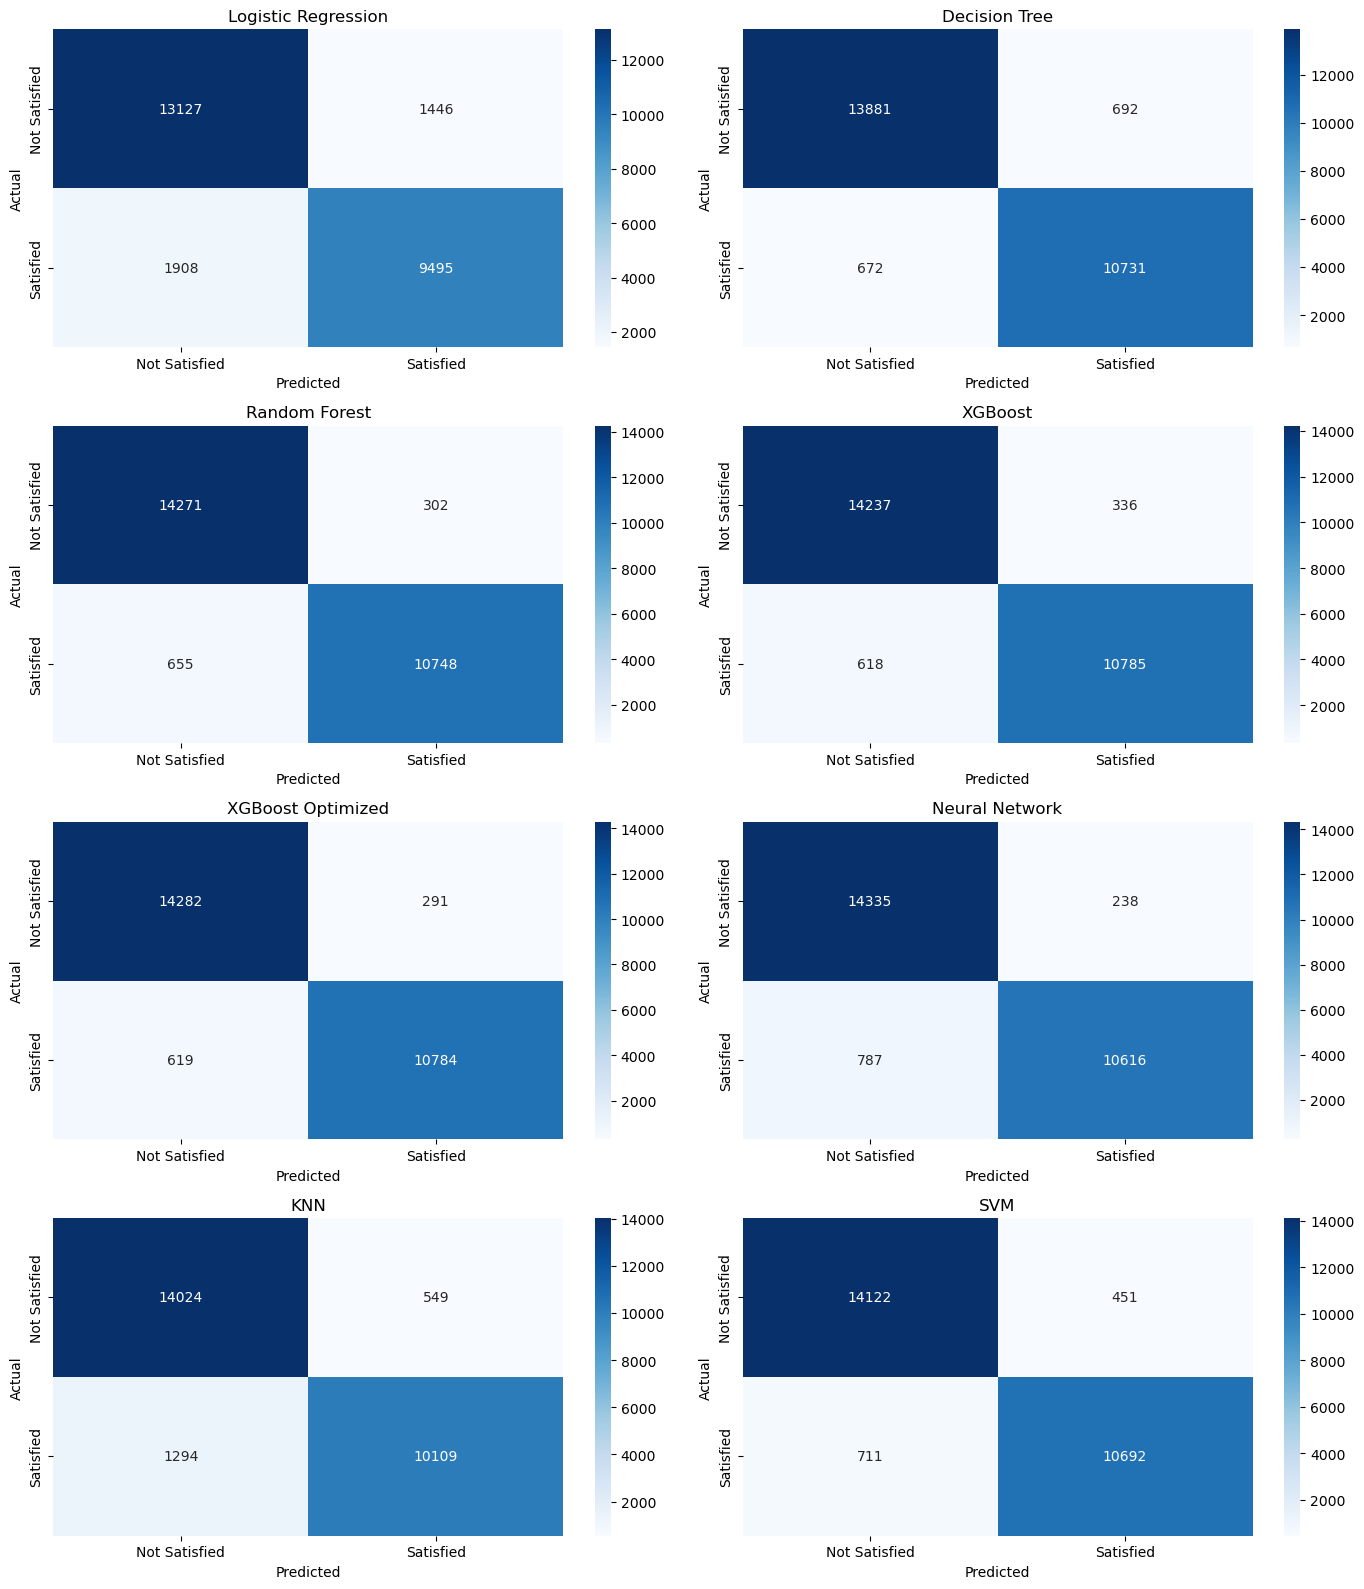

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrices for each model (replace with your actual confusion matrices)
confusion_matrices = {
    "Logistic Regression": log_conf_matrix,
    "Decision Tree": dt_conf_matrix,
    "Random Forest": rf_conf_matrix,
    "XGBoost": xgb_conf_matrix,
    "XGBoost Optimized": xgb_opt_conf_matrix,
    "Neural Network": nn_conf_matrix,
    "KNN": knn_conf_matrix,
    "SVM": svm_conf_matrix
}

# Set up the plot grid
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

# Loop through models and their confusion matrices
for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], 
                yticklabels=['Not Satisfied', 'Satisfied'], ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Conclusion ###

##### Performance Overview #####

- The XGBoost Classifier (Optimized) and Random Forest Classifier offer the best overall performance with an accuracy of 96% and a strong balance between precision, recall, and F1 scores. Both models effectively identify true positives while keeping false negatives and false positives low.
- Support Vector Machine (SVM), with its 96% accuracy, is comparable to Random Forest and XGBoost, providing high precision and recall but slightly more false positives compared to the tree-based models.
- Neural Network achieves a 95% accuracy with strong precision and recall, performing particularly well with fewer false positives, making it a good alternative when seeking flexibility in model architecture.

##### Precision, Recall, and F1 Score Insights #####

- XGBoost (Optimized), XGBoost, and Random Forest maintain high precision (0.96) and recall (0.98) for 'Not Satisfied', resulting in the highest F1 scores for this class.
- KNN Nearest Neighbor achieves a slightly lower accuracy of 93%, due to a higher false positive rate (1,294), indicating it may predict more instances as positive than other models.
- Logistic Regression, while simpler, has the lowest precision, recall, and F1 scores, indicating its struggle to separate the classes effectively compared to more complex models.

##### True Positives, False Negatives, and Positives Analysis #####

- XGBoost Optimized has the highest true positive count (14,282) and the lowest false negatives (291), making it the best choice for scenarios where missing 'Satisfied' cases is critical.
- Neural Network has a lower false positive count (569) compared to other models like KNN and SVM, which can be advantageous if reducing false alarms is a priority.
- KNN has the highest false positive count (1,294), suggesting a tendency to classify more instances as 'Satisfied', which could be problematic in cases where false positives need to be minimized.

##### Model Suitability for Different Scenarios #####

- XGBoost Optimized and Random Forest are ideal for balanced scenarios, providing the best trade-off between precision and recall, particularly when both classes are of equal importance.
- SVM is a strong candidate for well-separated classes, where a linear decision boundary can be effective.
- Neural Networks offer flexibility and are useful when more complex data patterns are present, albeit at the cost of longer training times and a slightly lower recall compared to Random Forest.
- Logistic Regression is suitable for baseline models and simpler scenarios but lacks the complexity needed for nuanced decision boundaries in this dataset.

##### Summary #####

- **Best Overall Performance: XGBoost Optimized and Random Forest due to their balanced metrics and low false negative rates.**
- Most Efficient in Reducing False Positives: Neural Network with a lower false positive count.
- Simple and Fast Option: Logistic Regression is not competitive in performance but could serve as a quick reference point.
- Trade-offs in Complexity and Interpretability: Models like Decision Trees and Random Forest provide interpretability through feature importance, while Neural Networks and SVM offer flexibility for more complex decision-making.
- **In summary, XGBoost Optimized is the most suitable choice for applications requiring the highest precision and recall balance**, while Random Forest and SVM provide comparable alternatives.